# Problem Statement
You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

### Dataset Link
https://www.kaggle.com/datasets/oossiiris/hackerearth-machine-learning-exhibit-art

<img src="1.jpg" alt="Image" width="800" height="900">
Image credit: SharkFold

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as td

# Reading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\Projects\HackerEarth_Exhibition\archive\dataset\train.csv")

# Basic EDA

In [3]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [5]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [6]:
df.drop('Customer Id',axis=1,inplace=True)

# Handling Null Values

In [7]:
df.isnull().sum()

Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

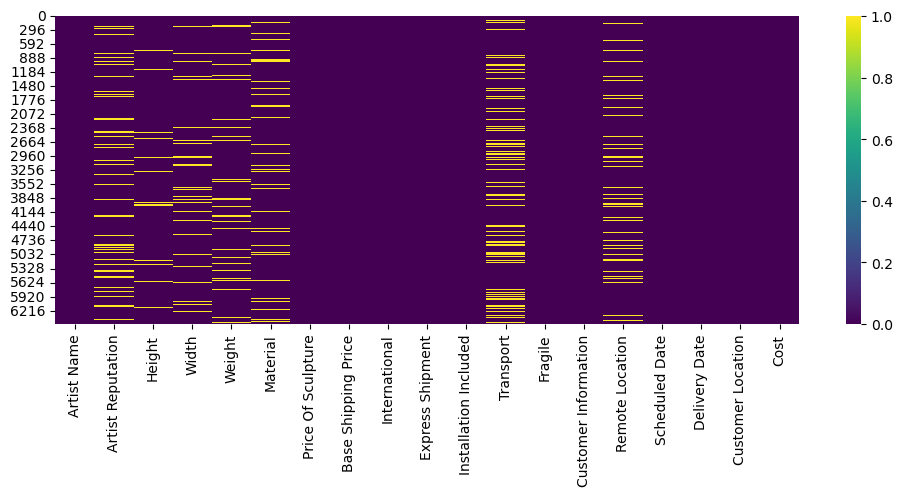

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cmap='viridis');

#### There is no pattern in null values so we can drop them.

In [9]:
df.dropna(inplace=True)

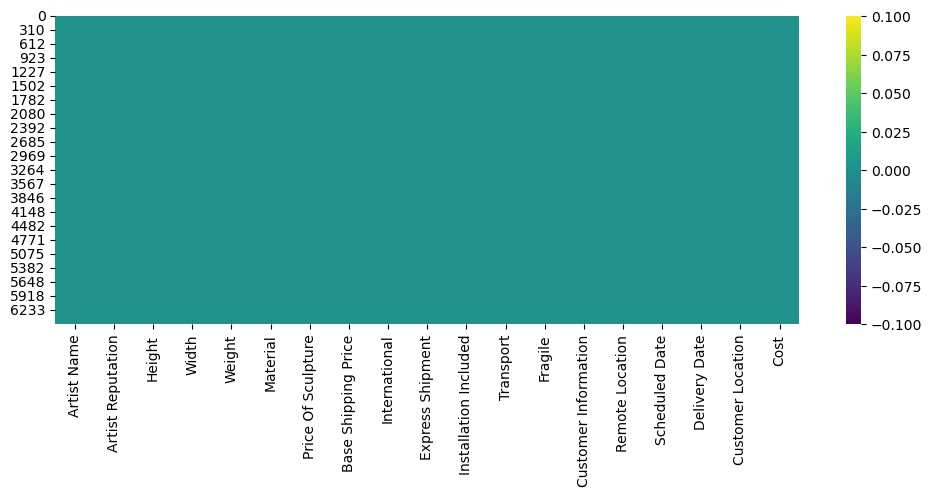

In [10]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cmap='viridis');

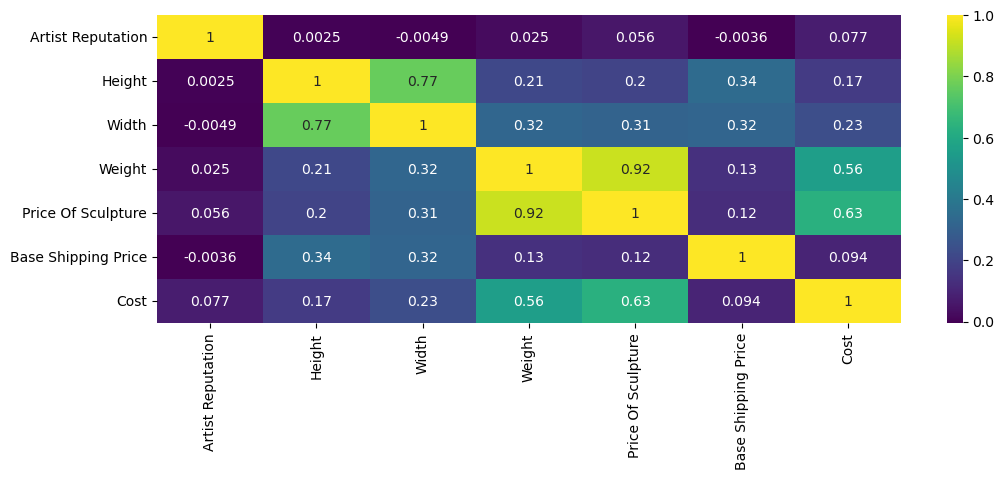

In [11]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),cmap='viridis',annot=True);

#### 1. There is a high correlation between Cost and Weight of the Sculptures.
#### 2. There is a high correlation between Cost and Price of the Sculptures.
#### 3. There is a high correlation between Height and Width of the Sculptures.
#### 4. There is a high correlation between Weight and Price of the Sculptures.

# Chi2 Test

In [12]:
from scipy.stats import chi2_contingency
import pandas as pd

asso = []

def chi2(var1, var2, col1, col2):
    print(f'Test Between {col1} and {col2}')
    
    contingency_table = pd.crosstab(var1, var2)
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    alpha = 0.05
    print(f'Test Between {col1} and {col2} \n')
    print("\nChi-Square Statistic:", chi2)
    print("P-value:", p)
    print("Degrees of Freedom:", dof)
    
    if p < alpha:
        asso.append([col1, col2, p])
        print(f"\nResult: Reject the null hypothesis (significant association).")
    else:
        print(f"\nResult: Fail to reject the null hypothesis (no significant association).")
    
    print('*' * 100, '\n')


In [13]:
cat_df = df.select_dtypes(include='object')
cat_df.head()

,Artist Name,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,Billy Jenkins,Brass,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777"
1,Jean Bryant,Brass,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072"
2,Laura Miller,Clay,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241"
4,Rosalyn Krol,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793"
6,David Hawes,Brass,No,Yes,No,Roadways,No,Working Class,No,06/05/16,06/02/16,"South Matthew, WV 76033"


In [14]:
num_df = df.select_dtypes(include='float64')
num_df.head()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
0,0.26,17.0,6.0,4128.0,13.91,16.27,-283.29
1,0.28,3.0,3.0,61.0,6.83,15.00,-159.96
2,0.07,8.0,5.0,237.0,4.96,21.18,-154.29
4,0.15,17.0,6.0,324.0,3.18,11.94,-159.23
6,0.64,17.0,9.0,7264.0,8.26,90.67,-1536.66


In [15]:

for i in range(len(cat_df.columns)):
    for j in range(i + 1, len(cat_df.columns)):
        col1 = cat_df.columns[i]
        col2 = cat_df.columns[j]
        chi2(cat_df[col1], cat_df[col2], col1, col2)

Test Between Artist Name and Material
Test Between Artist Name and Material 


Chi-Square Statistic: 20099.73043212188
P-value: 0.4992098736218776
Degrees of Freedom: 20100

Result: Fail to reject the null hypothesis (no significant association).
**************************************************************************************************** 

Test Between Artist Name and International
Test Between Artist Name and International 


Chi-Square Statistic: 3351.583807037159
P-value: 0.4890341946613792
Degrees of Freedom: 3350

Result: Fail to reject the null hypothesis (no significant association).
**************************************************************************************************** 

Test Between Artist Name and Express Shipment
Test Between Artist Name and Express Shipment 


Chi-Square Statistic: 3362.0
P-value: 0.4385797796779092
Degrees of Freedom: 3350

Result: Fail to reject the null hypothesis (no significant association).
****************************************

In [16]:
print("Associated columns:")
for association in asso:
    col1, col2, p = association
    print(f"{col1} and {col2} (p-value = {p})")

Associated columns:
Material and Express Shipment (p-value = 0.018364283434406273)
Material and Fragile (p-value = 0.0)
International and Transport (p-value = 3.039035636621433e-192)
Express Shipment and Transport (p-value = 6.189211776952267e-223)
Express Shipment and Customer Information (p-value = 1.3170106660427103e-103)
Transport and Customer Information (p-value = 6.9448846460874165e-34)
Scheduled Date and Delivery Date (p-value = 0.0)


#### Material and Shipment Attributes: 
Material type influences shipment attributes such as express classification and fragility.
#### International and Transport: 
International shipments significantly differ in transportation methods compared to domestic ones.
#### Express Shipment and Logistics:
Express shipments are strongly associated with both transportation methods and specific customer information.
#### Scheduled Date and Delivery:
The scheduled date strongly influences the actual delivery date, indicating a close relationship between these temporal variables.

# Annova Test

In [17]:
import pandas as pd
from scipy.stats import f_oneway

sig = []
def annova(var1, var2):
    numerical_variable = var1
    categorical_variable = var2
    
    # Filter out rows with missing values for the chosen variables
    filtered_data = df[[numerical_variable, categorical_variable]].dropna()

    # Perform the ANOVA test
    groups = [filtered_data[numerical_variable][filtered_data[categorical_variable] == category]
              for category in filtered_data[categorical_variable]]
    
    f_statistic, p_value = f_oneway(*groups)
    
    alpha = 0.05
    
    # Assess the result
    if p_value < alpha:
        sig.append([numerical_variable, categorical_variable, p_value])
        print(f"ANOVA Result for {numerical_variable} across {categorical_variable}:")
        print("Result: Reject the null hypothesis (significant differences between categories).")
        print('*' * 100, '\n')
    else:
        print(f"ANOVA Result for {numerical_variable} across {categorical_variable}:")
        print("Result: Fail to reject the null hypothesis (no significant differences between categories).")
        print('*' * 100, '\n')


In [18]:
for i in num_df.columns:
    for j in cat_df:
        annova(i, j)

ANOVA Result for Artist Reputation across Artist Name:
Result: Fail to reject the null hypothesis (no significant differences between categories).
**************************************************************************************************** 

ANOVA Result for Artist Reputation across Material:
Result: Fail to reject the null hypothesis (no significant differences between categories).
**************************************************************************************************** 

ANOVA Result for Artist Reputation across International:
Result: Fail to reject the null hypothesis (no significant differences between categories).
**************************************************************************************************** 

ANOVA Result for Artist Reputation across Express Shipment:
Result: Fail to reject the null hypothesis (no significant differences between categories).
***************************************************************************************************

In [19]:
for i in sig:
    print(i)

['Artist Reputation', 'Installation Included', 1.1200018562788593e-27]
['Height', 'Material', 7.445292100584054e-29]
['Height', 'Fragile', 0.0]
['Height', 'Delivery Date', 0.01015853997024603]
['Width', 'Fragile', 8.419662228930523e-94]
['Width', 'Delivery Date', 0.03393428719757227]
['Weight', 'Artist Name', 1.1665355092200964e-17]
['Weight', 'Material', 0.0]
['Weight', 'Installation Included', 0.0]
['Price Of Sculpture', 'Artist Name', 1.2280182076815824e-19]
['Price Of Sculpture', 'Material', 0.0]
['Price Of Sculpture', 'Installation Included', 3.190161800544675e-32]
['Base Shipping Price', 'Material', 0.0]
['Base Shipping Price', 'Fragile', 0.0]
['Cost', 'Artist Name', 3.7535649309578666e-15]
['Cost', 'Material', 0.0]
['Cost', 'Fragile', 8.803879821861028e-233]
['Cost', 'Scheduled Date', 2.8102286123811638e-05]
['Cost', 'Delivery Date', 1.83262598136487e-13]



#### Physical Attributes and Material/Fragility:
'Height' and 'Width' significantly relate to 'Material' and 'Fragile' attributes, indicating that the choice of material and fragility status greatly influences the dimensions of the sculpture.

#### Cost Factors:
'Weight', 'Price of Sculpture', 'Base Shipping Price', and 'Cost' are notably associated with 'Material', 'Artist Name', 'Installation Included', 'Fragile', and temporal factors ('Scheduled Date' and 'Delivery Date'). This implies that the cost of the sculpture and shipping is significantly impacted by these various factors, including the artist's reputation, material choice, fragility, and temporal considerations.

#### Temporal Elements:
'Delivery Date' and 'Scheduled Date' are significantly associated with 'Cost', indicating that the time frame in scheduling and actual delivery influences the overall cost of the process.

In [20]:
num_df.columns

Index(['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture',
       'Base Shipping Price', 'Cost'],
      dtype='object')

# EDA

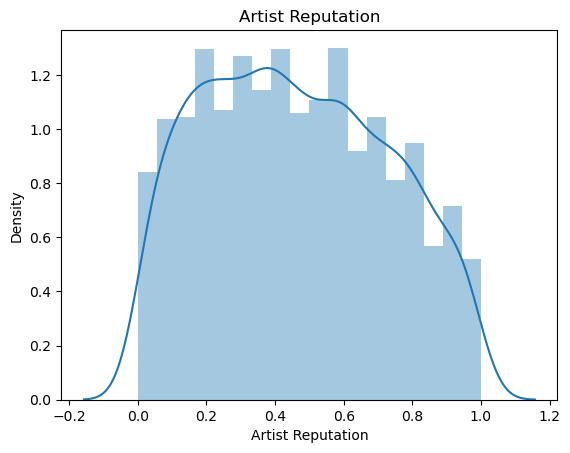

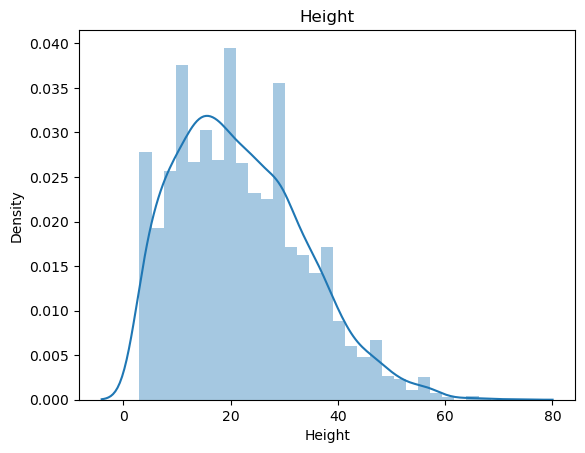

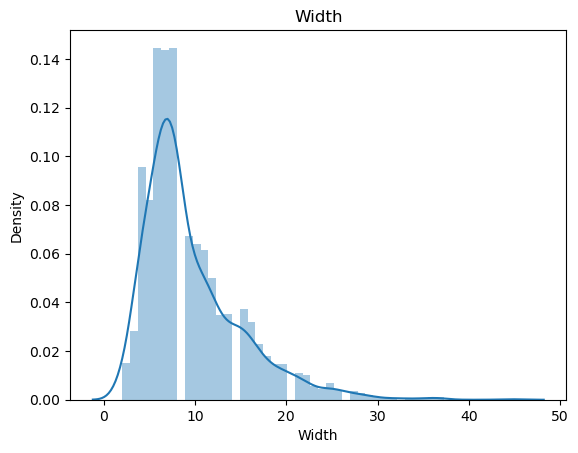

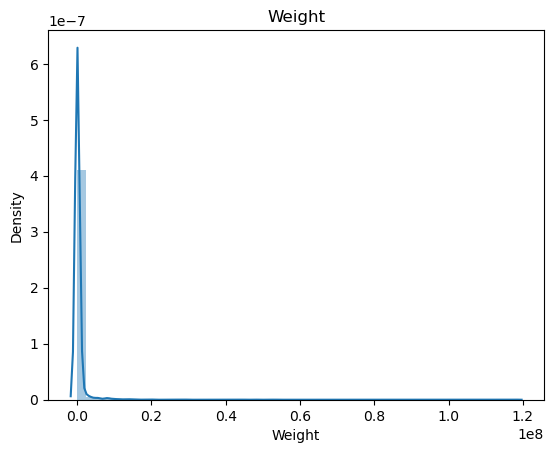

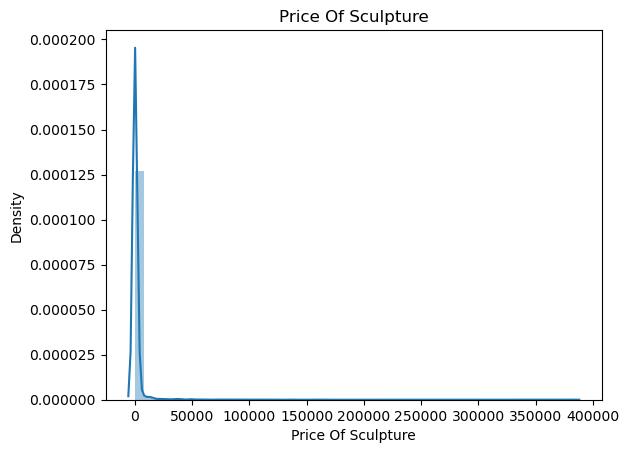

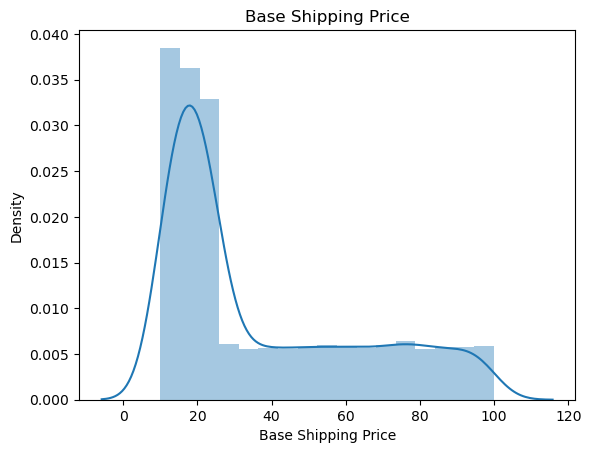

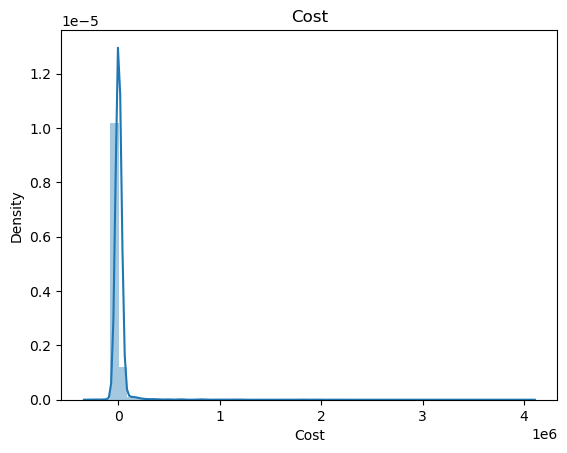

In [21]:
for i in num_df.columns:
    sns.distplot(num_df[i])
    plt.title(i)
    plt.show()

#### Few columns are not normally distributed

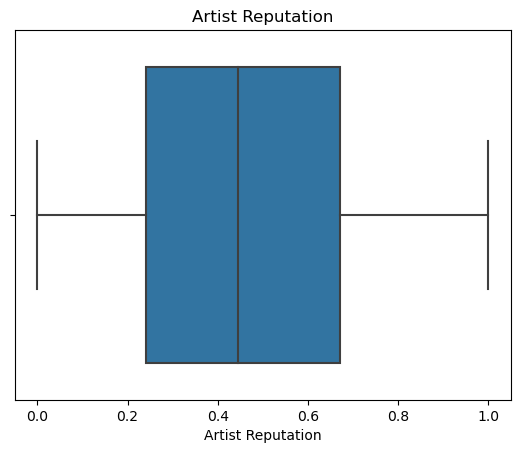

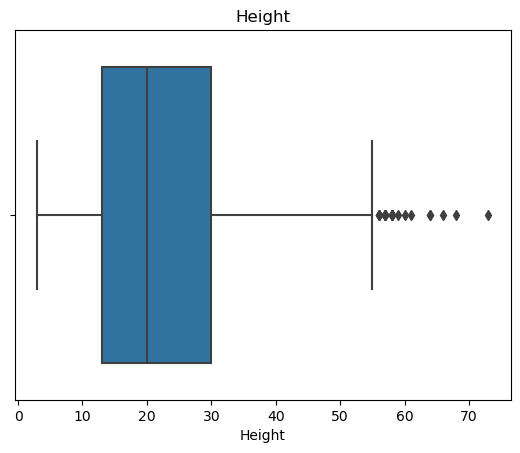

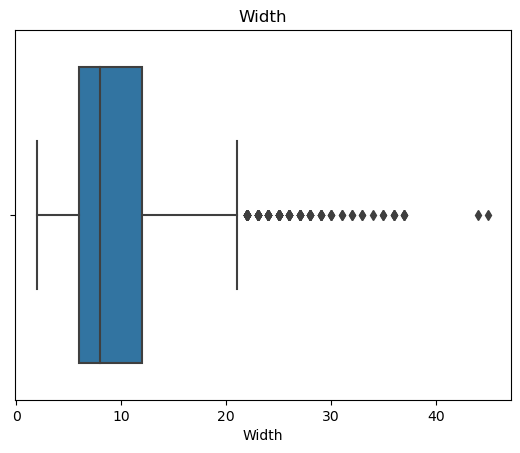

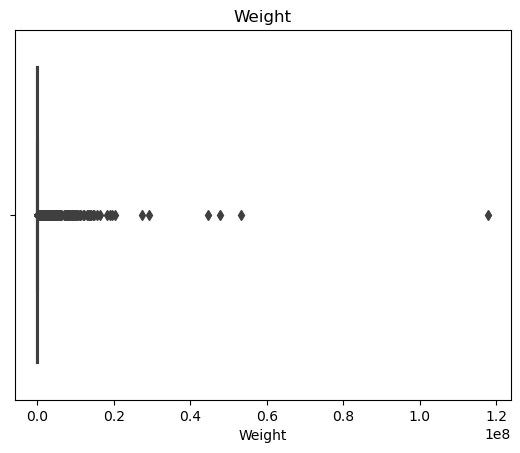

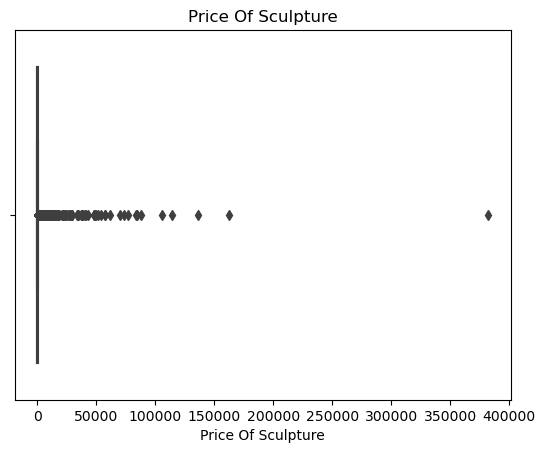

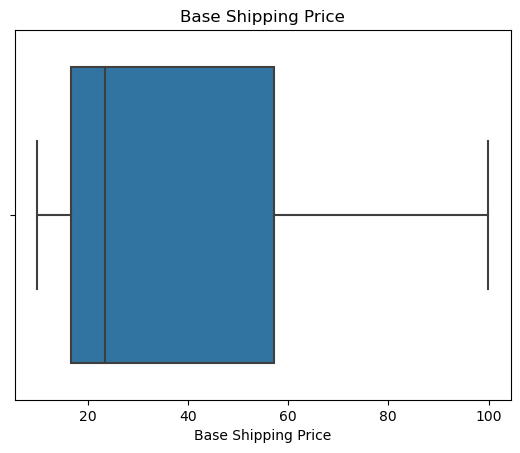

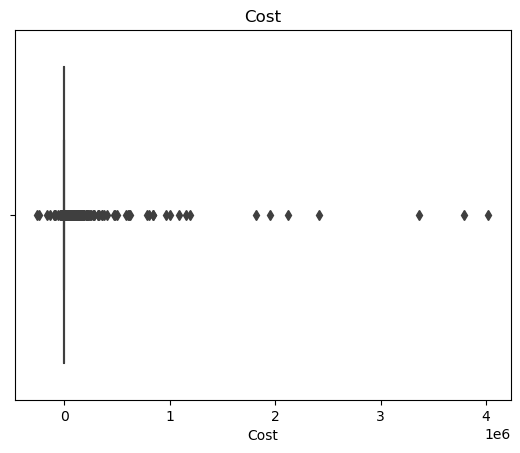

In [22]:
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.title(i)
    plt.show()

#### Outliers are also present in our dataset

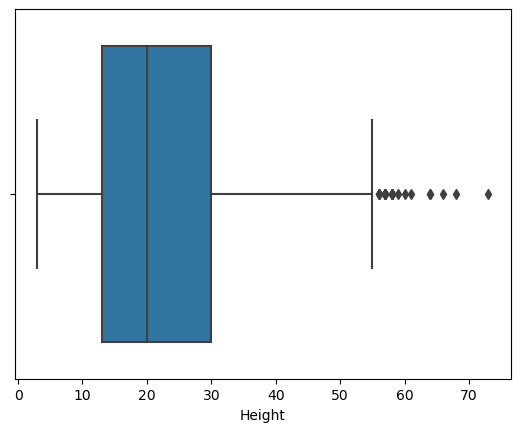

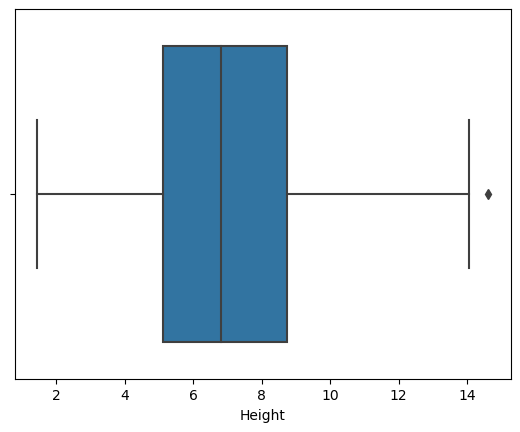

In [23]:
from scipy import stats
sns.boxplot(df['Height'])
plt.show();
df['Height'], values = stats.boxcox(df['Height'])
sns.boxplot(df['Height'])
plt.show();


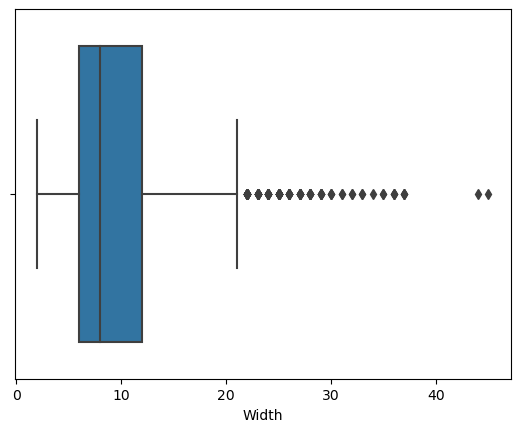

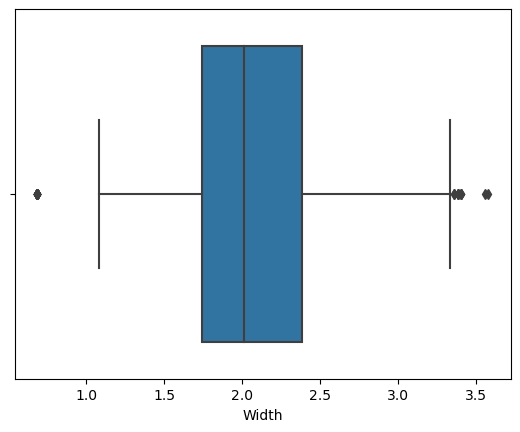

In [24]:
sns.boxplot(df['Width'])
plt.show();
df['Width'], values = stats.boxcox(df['Width'])
sns.boxplot(df['Width'])
plt.show();


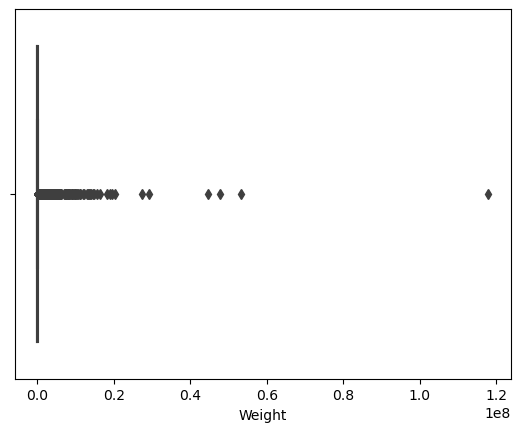

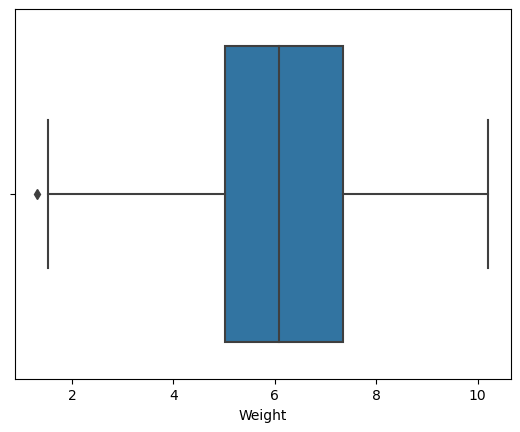

In [25]:
sns.boxplot(df['Weight'])
plt.show();
df['Weight'], values = stats.boxcox(df['Weight'])
sns.boxplot(df['Weight'])
plt.show();

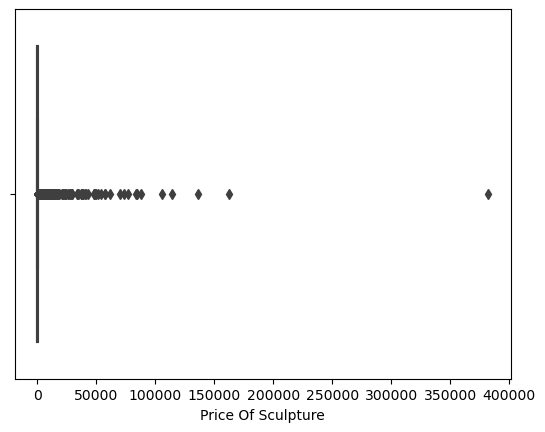

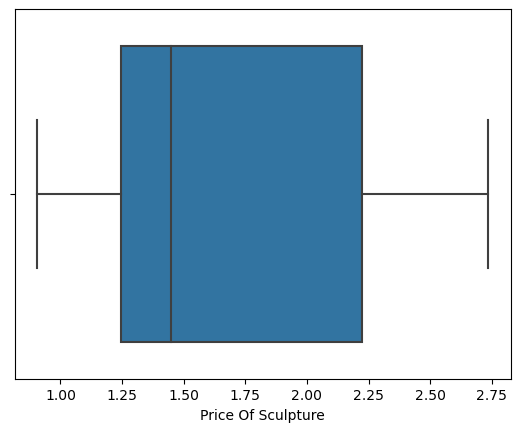

In [26]:
sns.boxplot(df['Price Of Sculpture'])
plt.show();
df['Price Of Sculpture'], values = stats.boxcox(df['Price Of Sculpture'])
sns.boxplot(df['Price Of Sculpture'])
plt.show();

#### Even after Box-Cox transformation some outliers are still present.

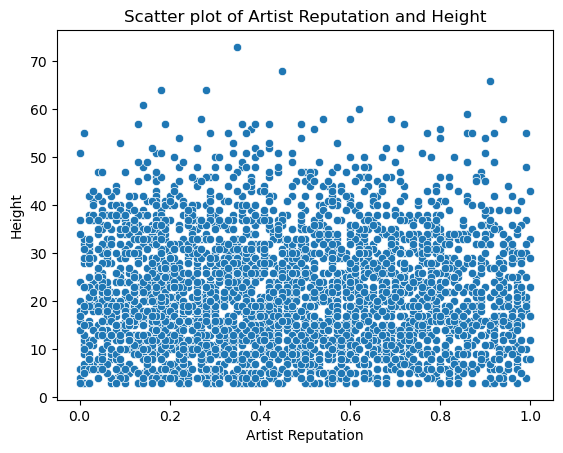

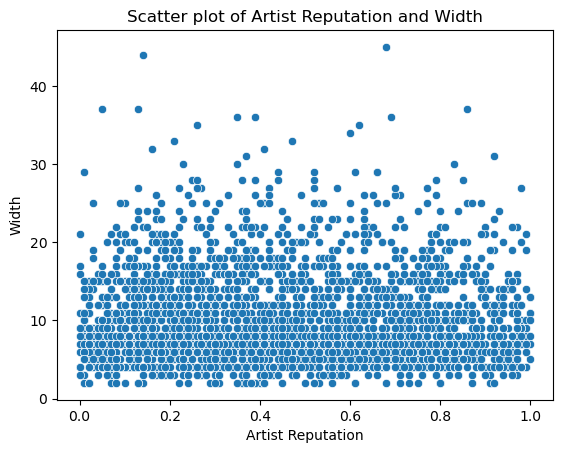

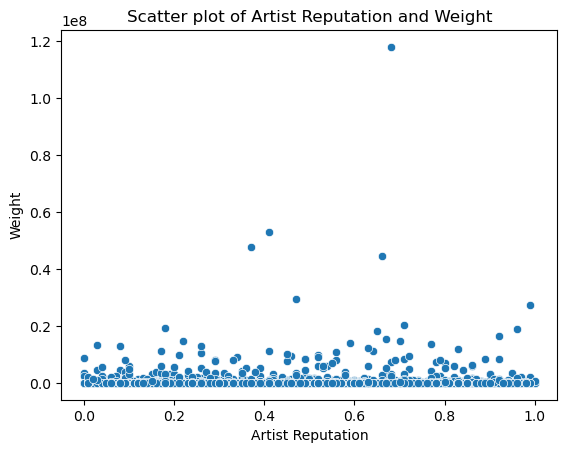

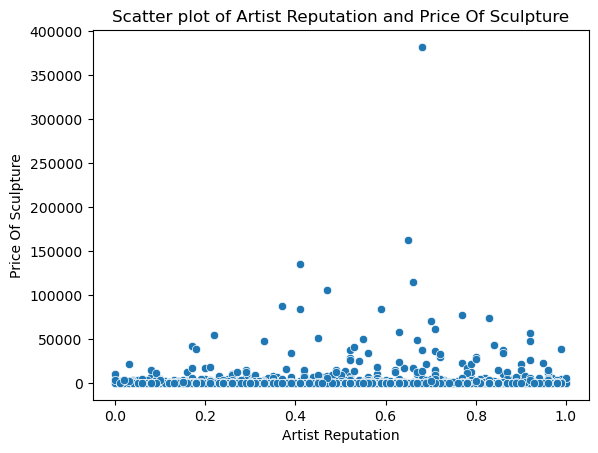

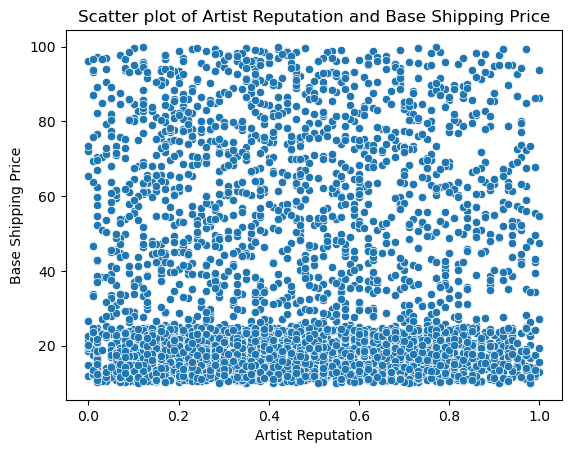

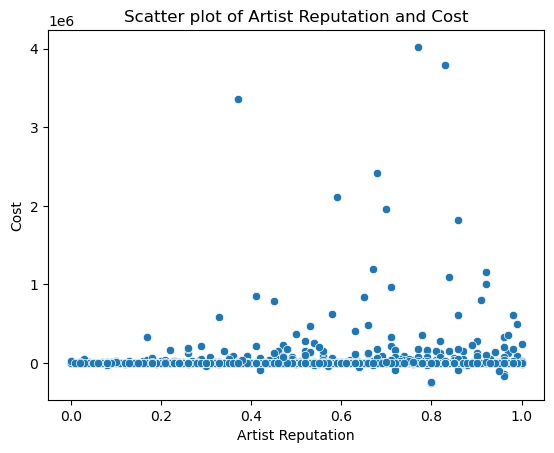

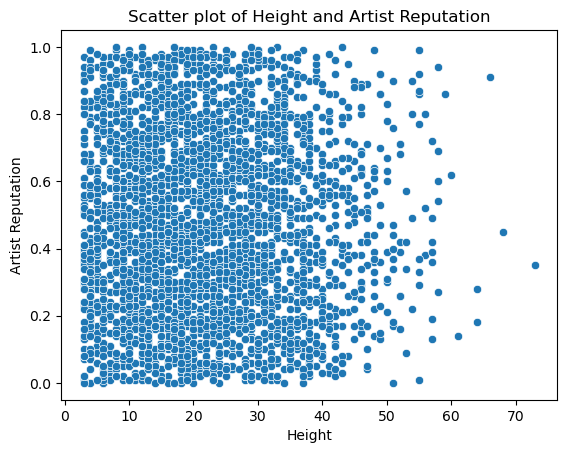

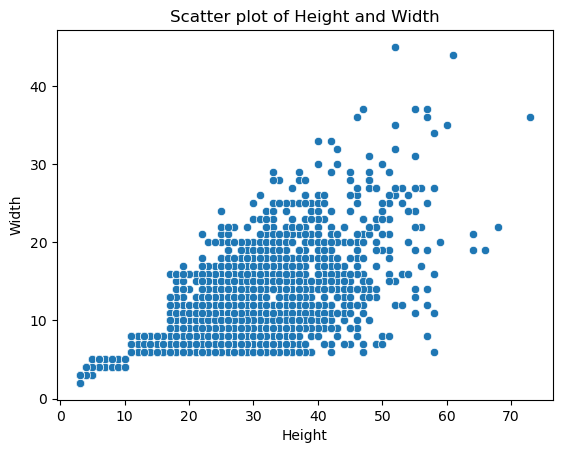

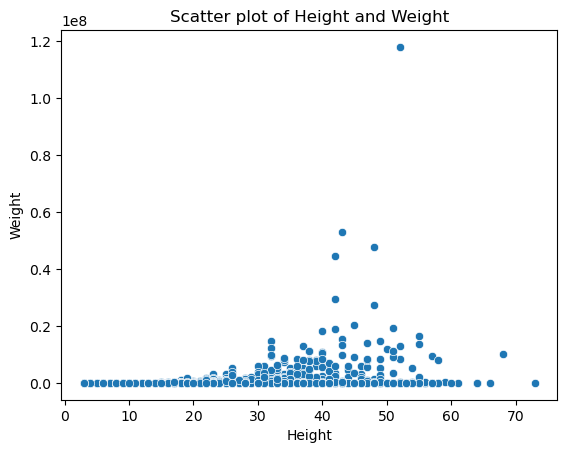

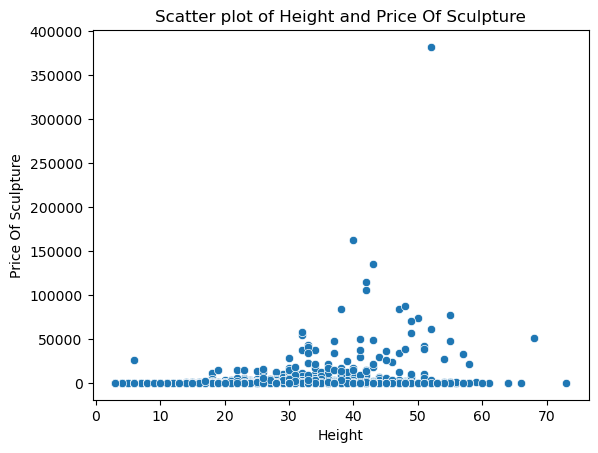

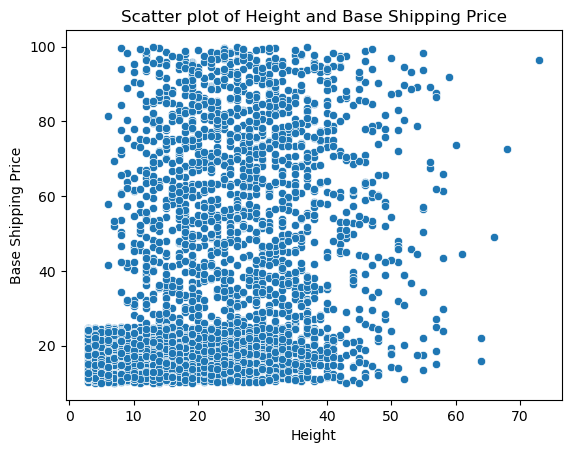

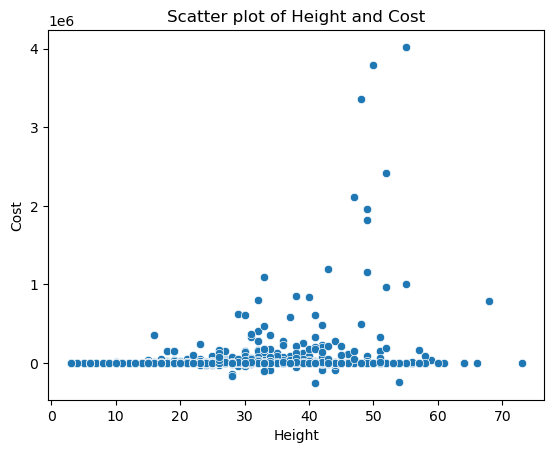

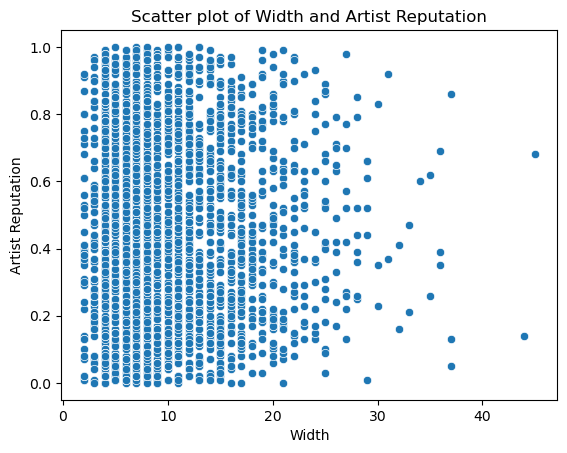

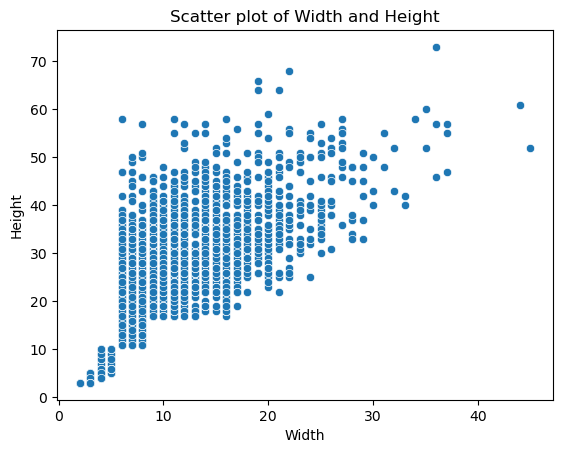

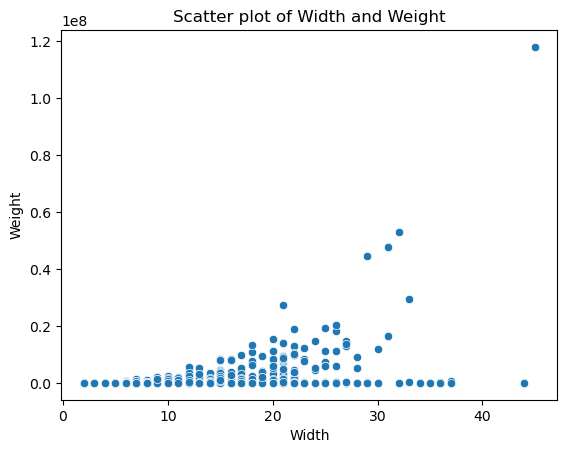

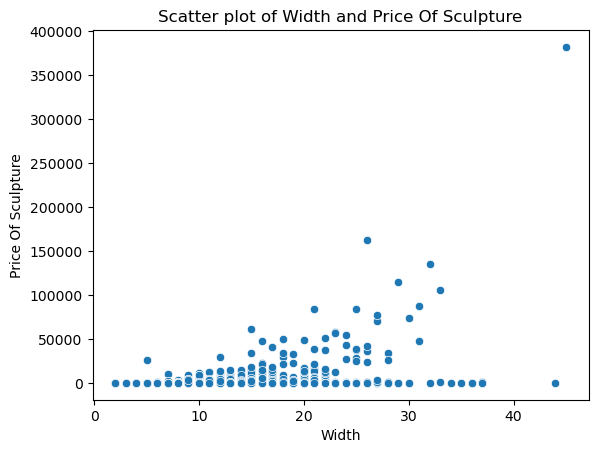

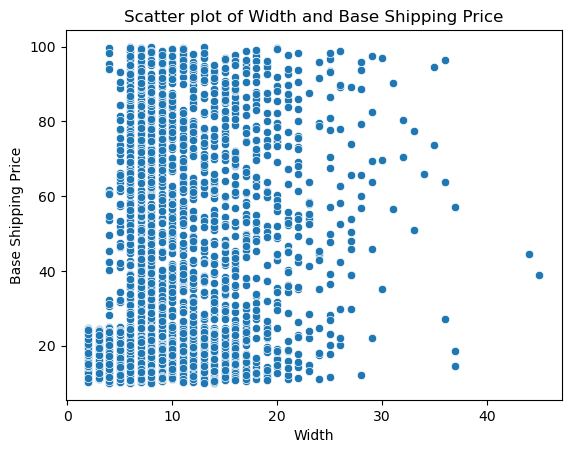

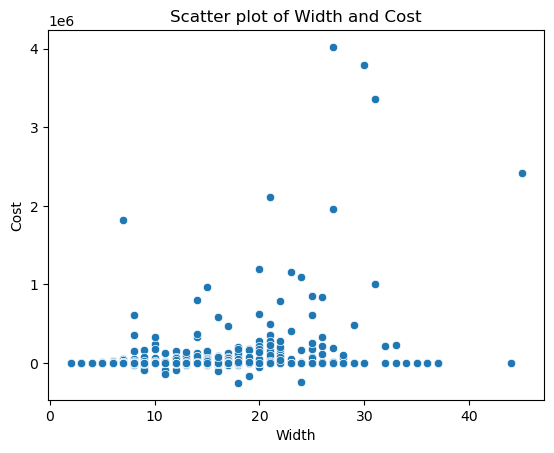

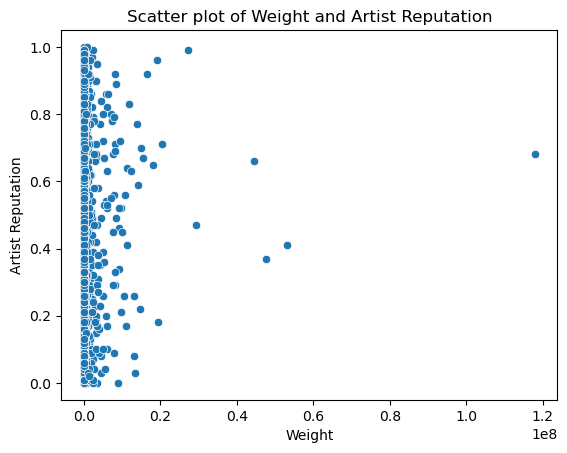

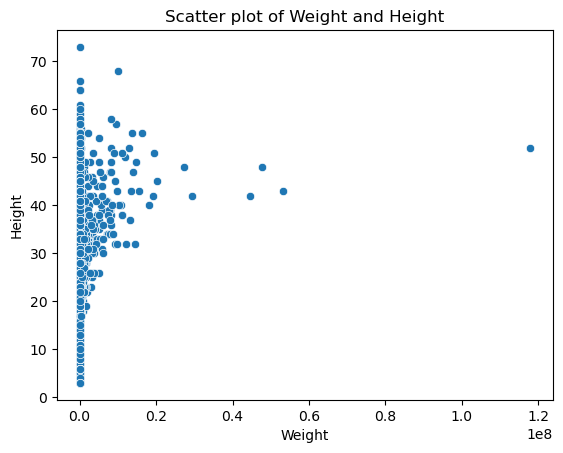

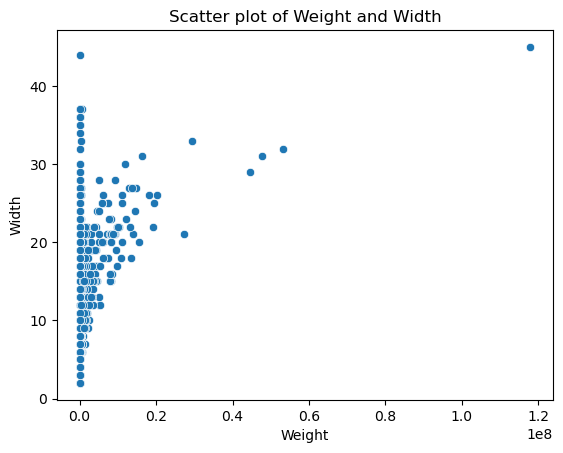

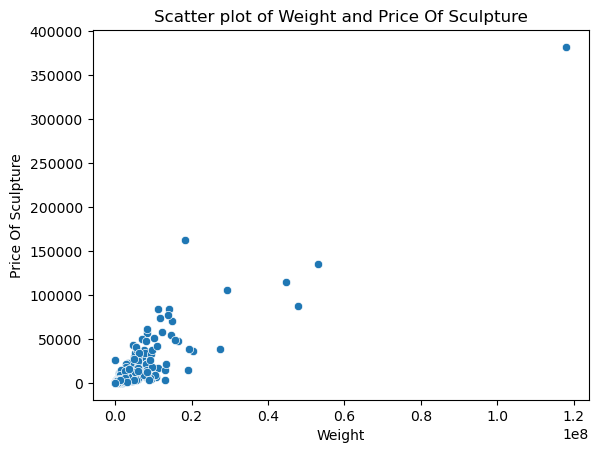

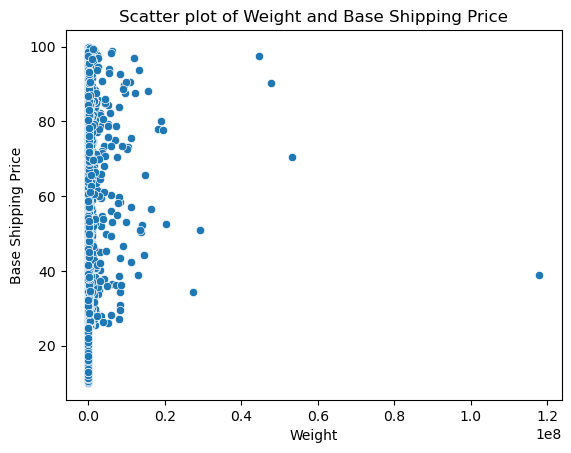

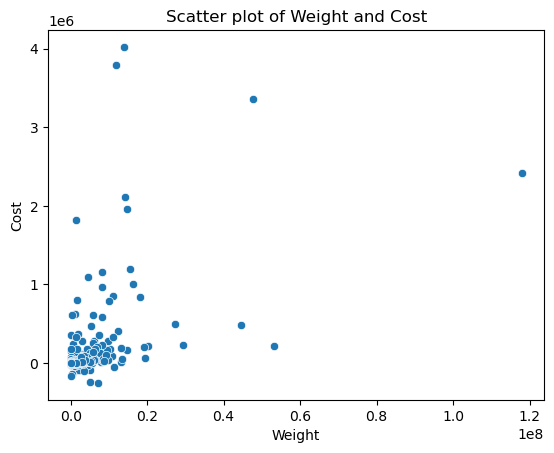

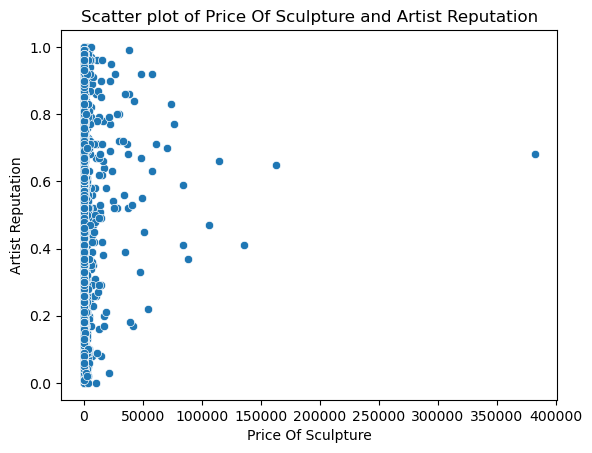

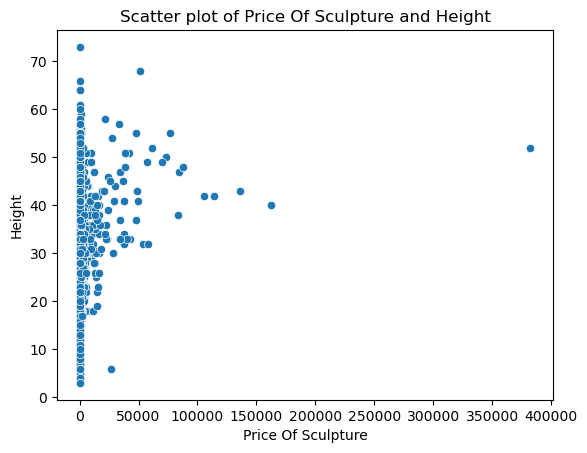

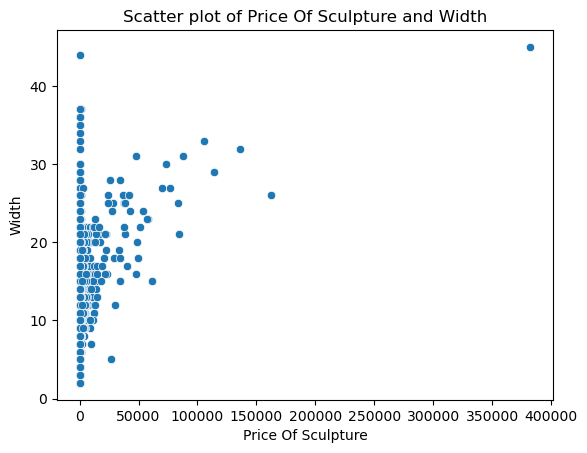

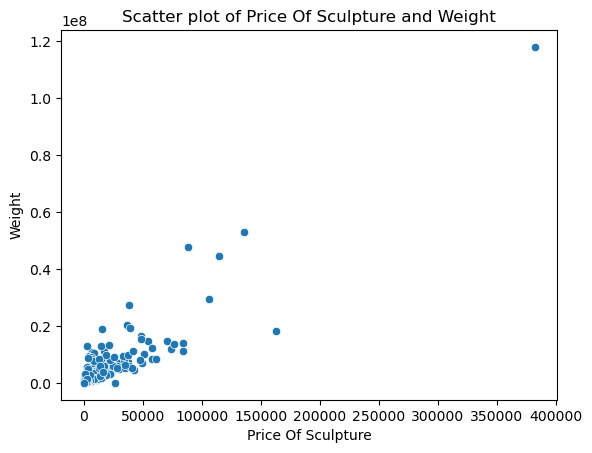

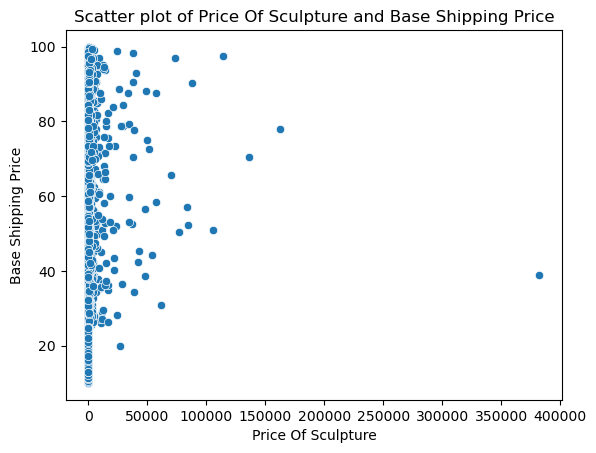

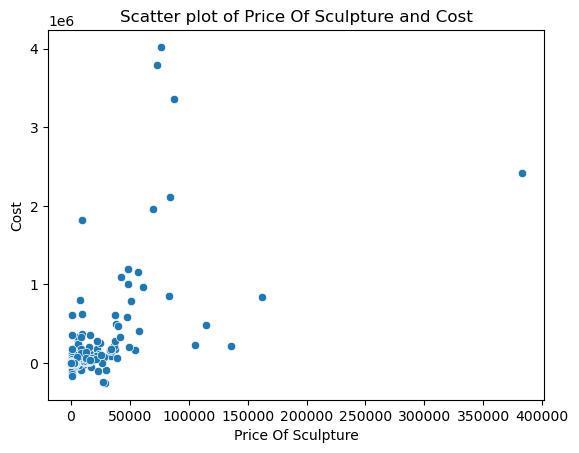

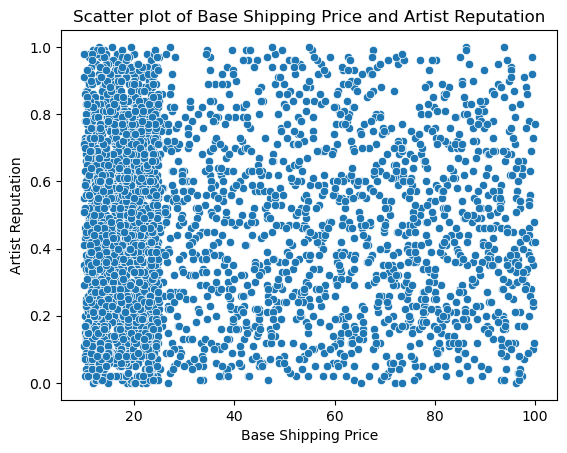

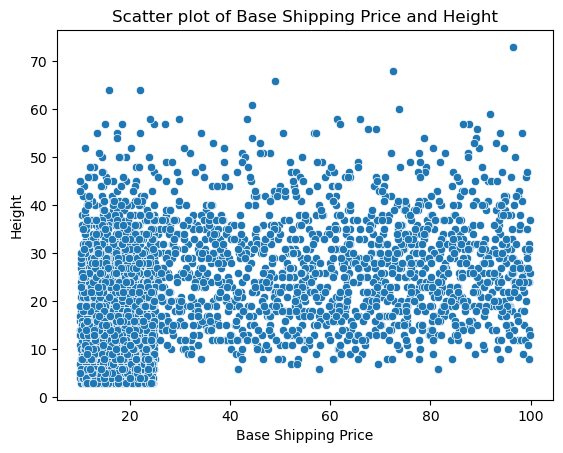

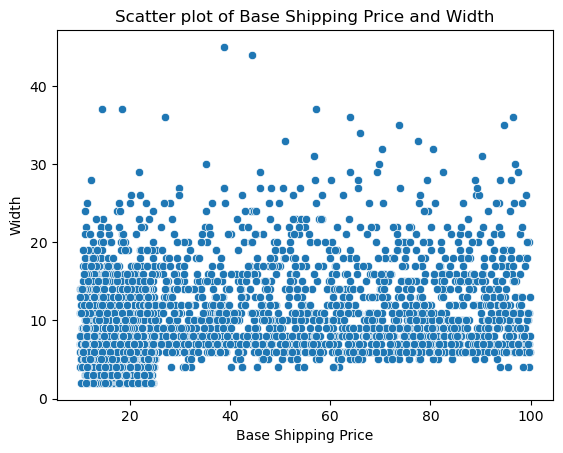

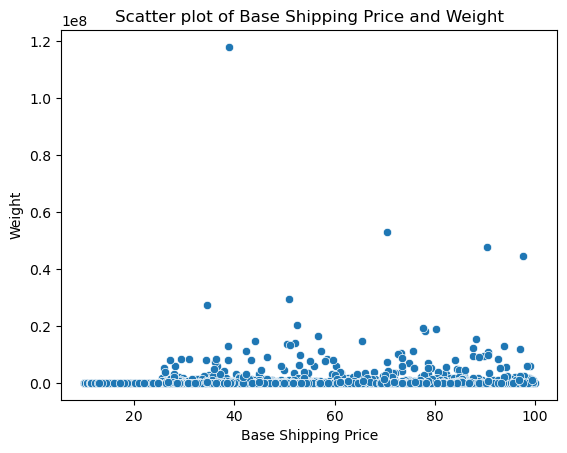

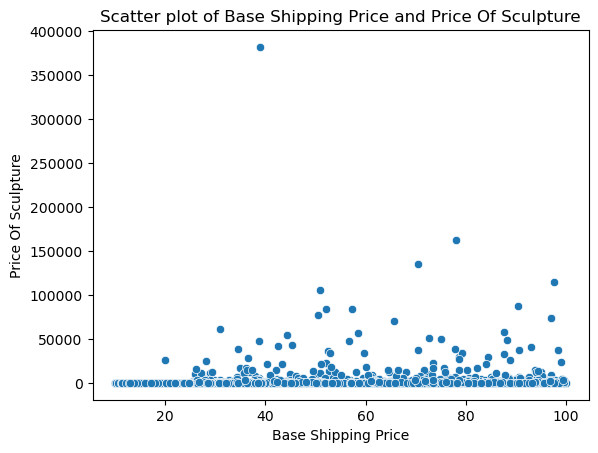

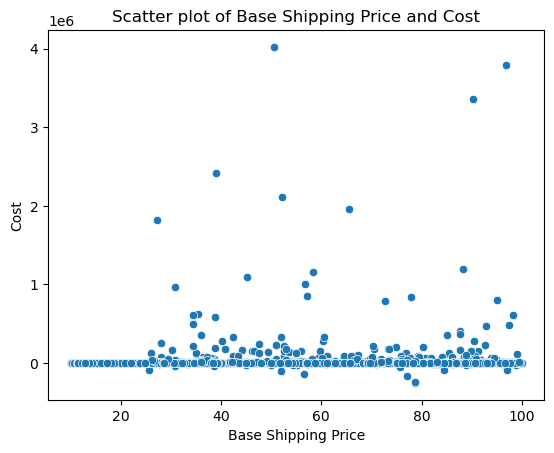

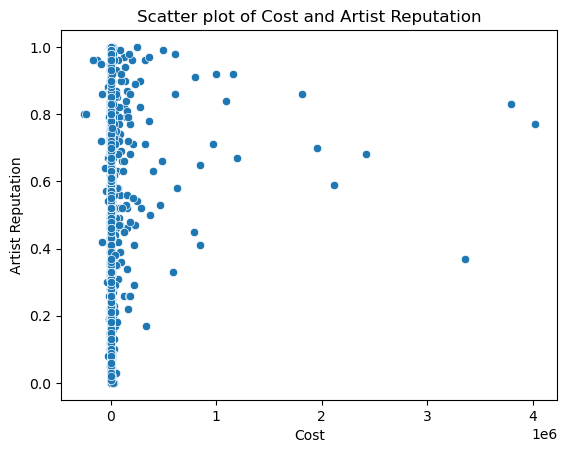

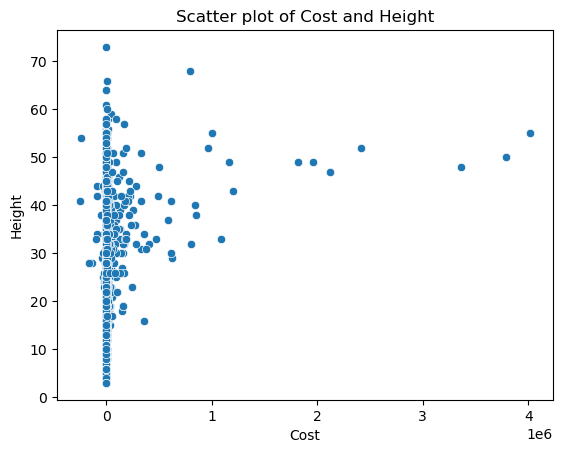

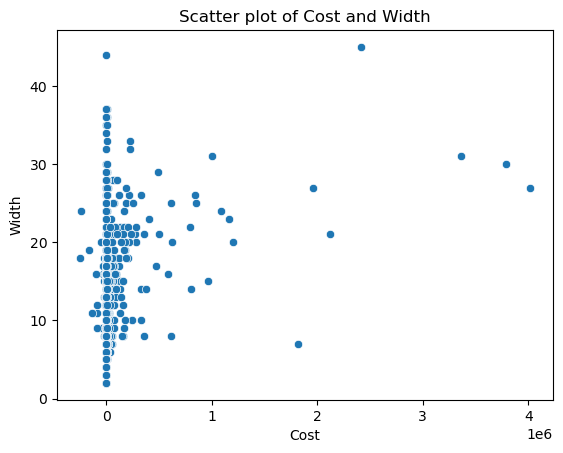

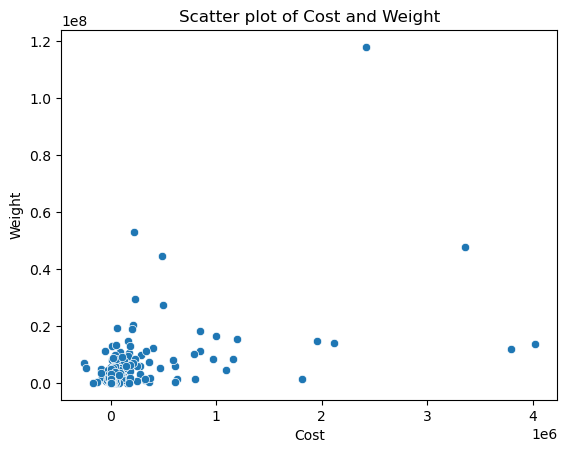

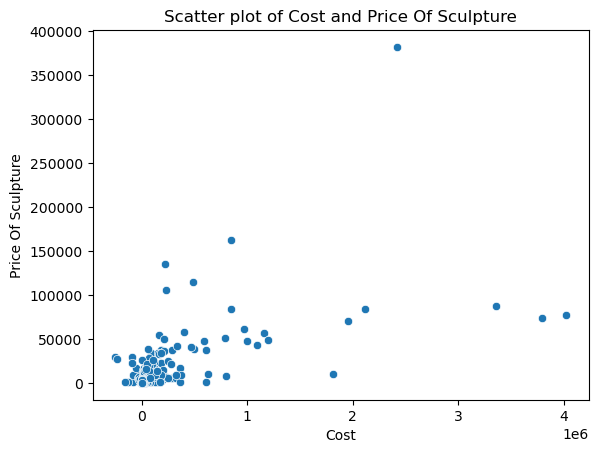

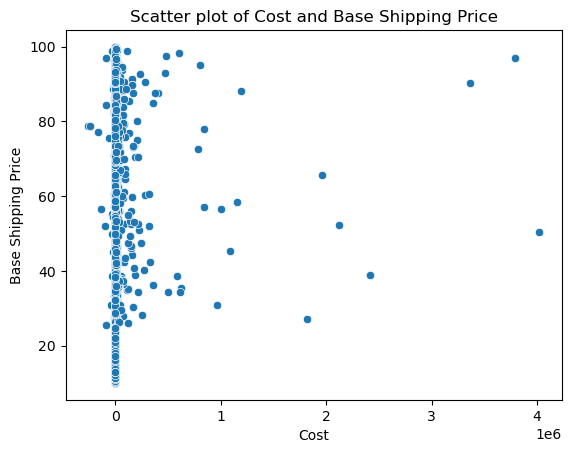

In [27]:
for i in num_df.columns:
    for j in num_df:
        if i != j:
            sns.scatterplot(num_df[i],num_df[j])
            plt.title(f'Scatter plot of {i} and {j}')
            plt.show()

#### Height and Weight are showing some relation 
#### Weight and Price of the Sculptures showing some relation

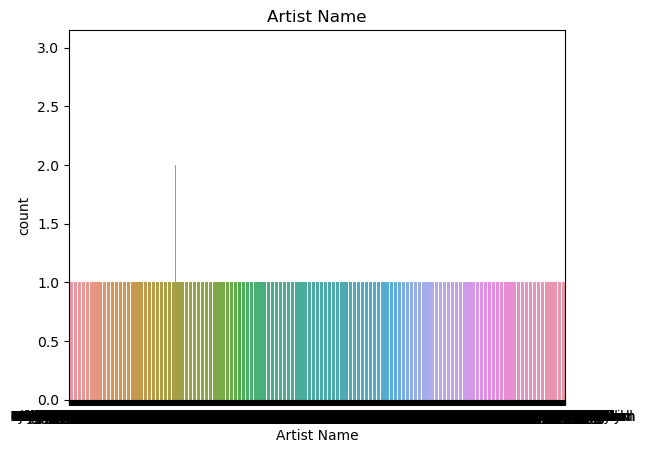

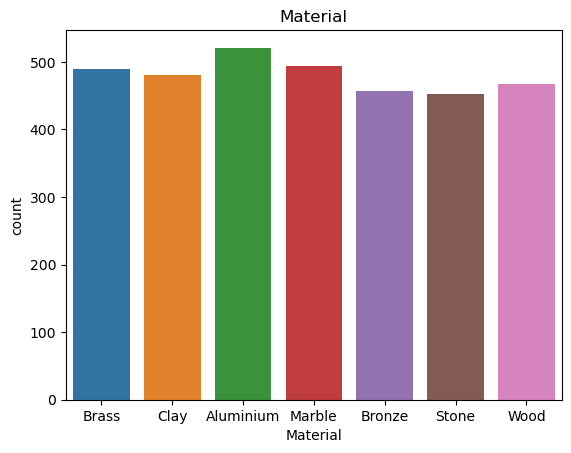

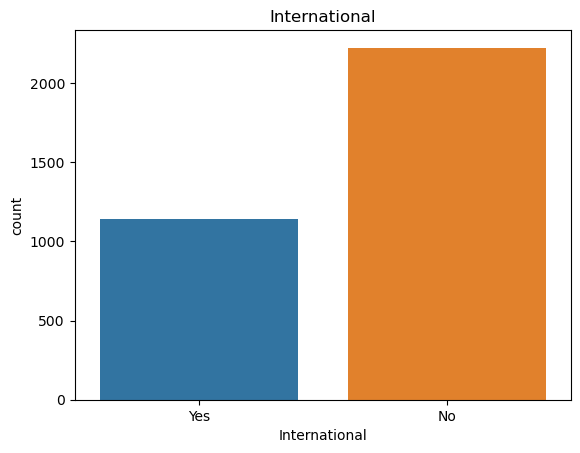

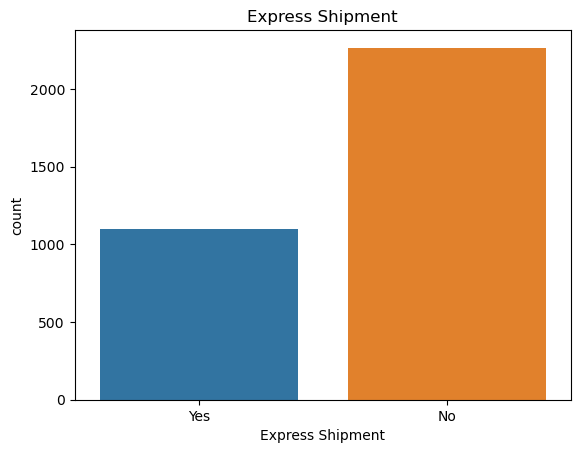

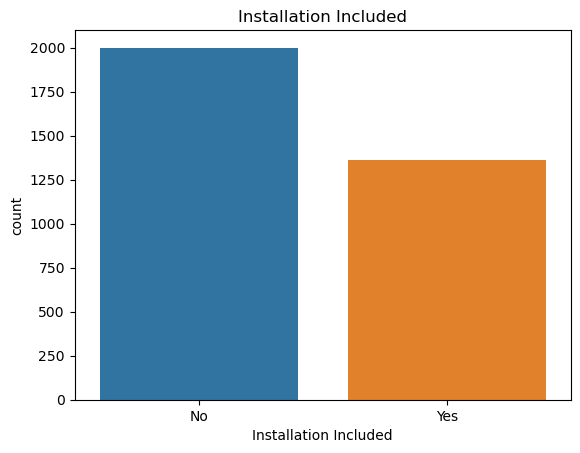

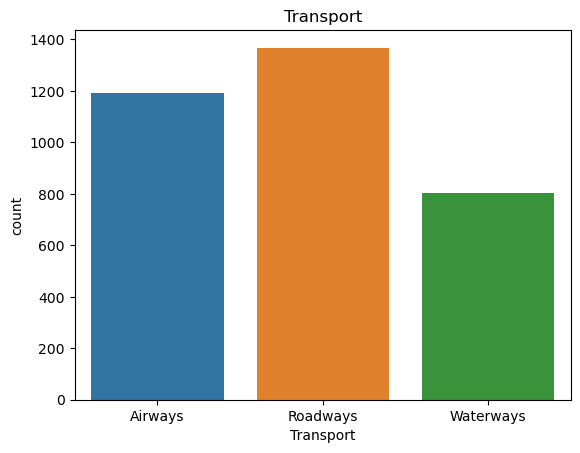

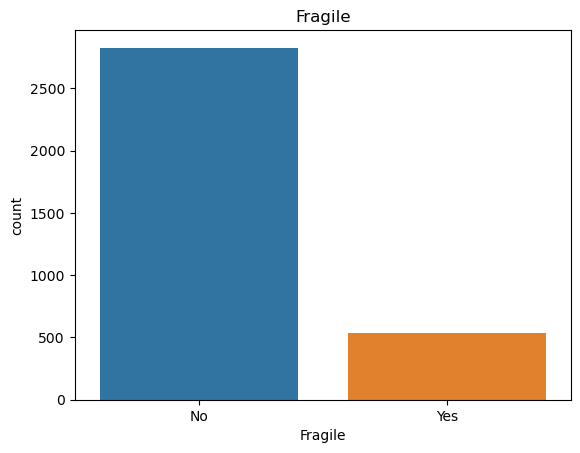

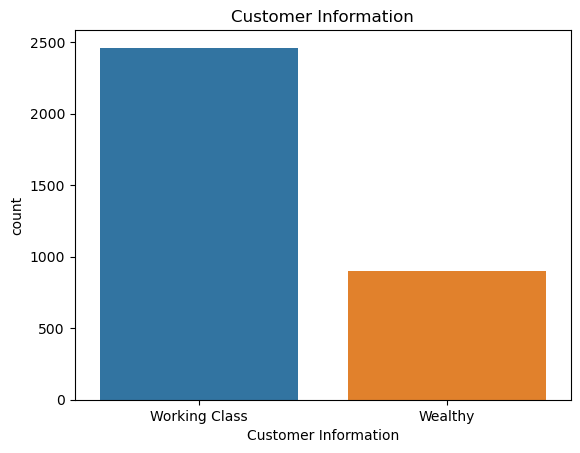

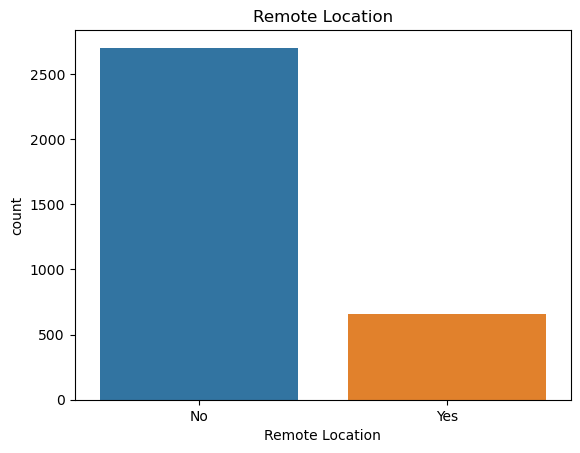

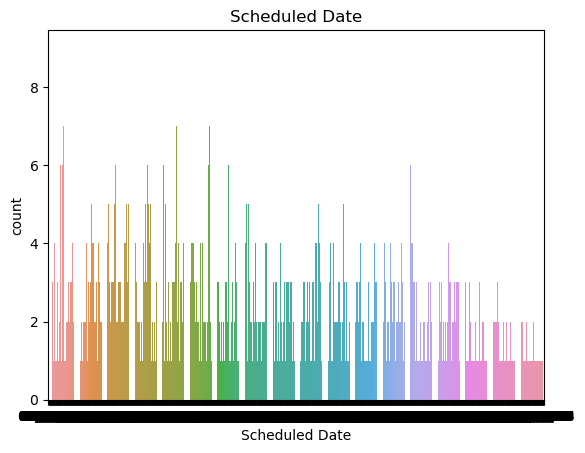

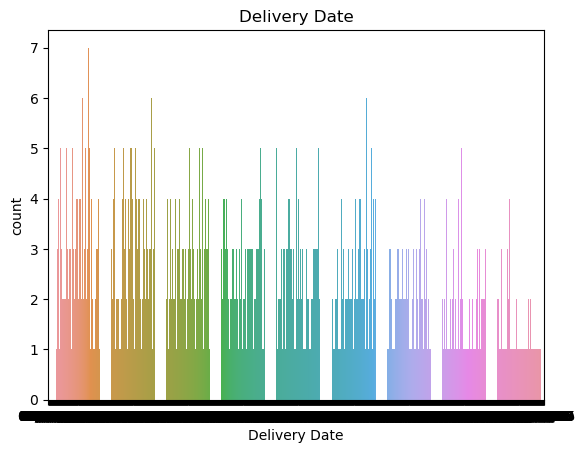

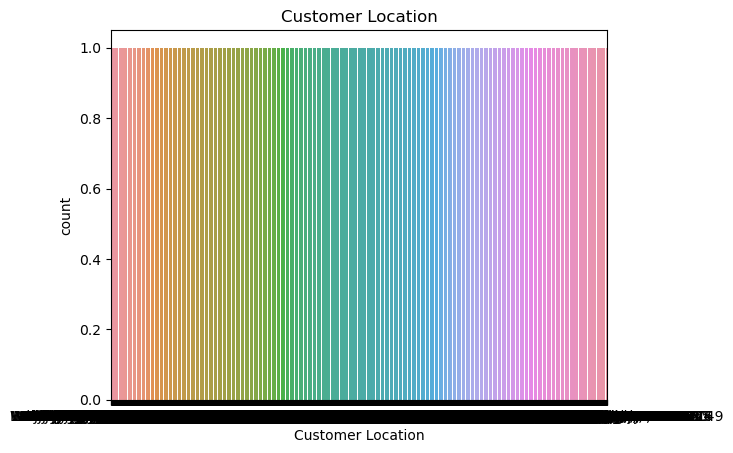

In [28]:
for i in cat_df.columns:
    sns.countplot(cat_df[i])
    plt.title(i)
    plt.show()

#### 1. Mostly Aluminium is used to make sculptures. There is no big difference.
#### 2. There are shipping around 50% items internationally.
#### 3. Very less itmes are fragile.
#### 4. Most orders are from working class 

In [29]:
df.columns

Index(['Artist Name', 'Artist Reputation', 'Height', 'Width', 'Weight',
       'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

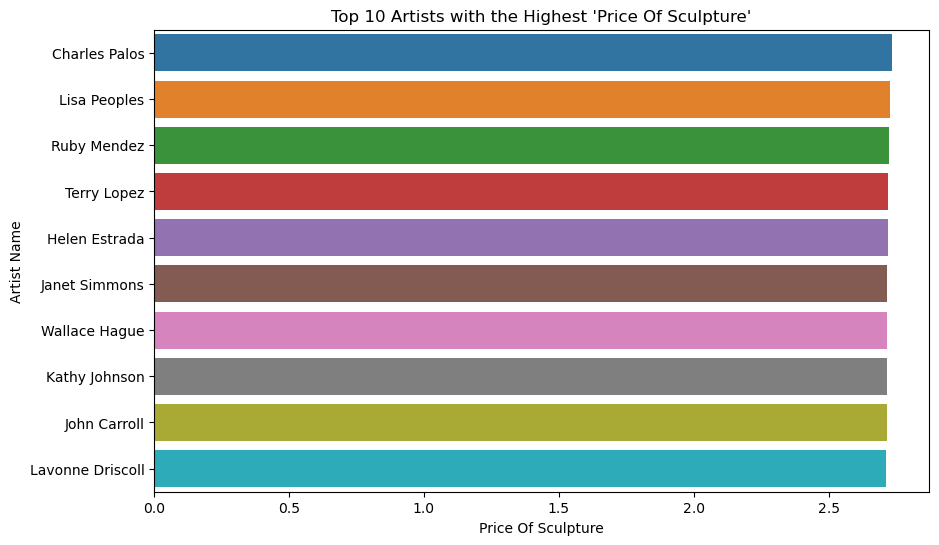

In [30]:

top_N = 10  
top_prices = df.nlargest(top_N, 'Price Of Sculpture')

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_prices, x='Price Of Sculpture', y='Artist Name')
plt.title(f"Top {top_N} Artists with the Highest 'Price Of Sculpture'")
plt.xlabel("Price Of Sculpture")
plt.ylabel("Artist Name")
plt.show()

#### There is no big difference in the top artist with their sculpture prices.

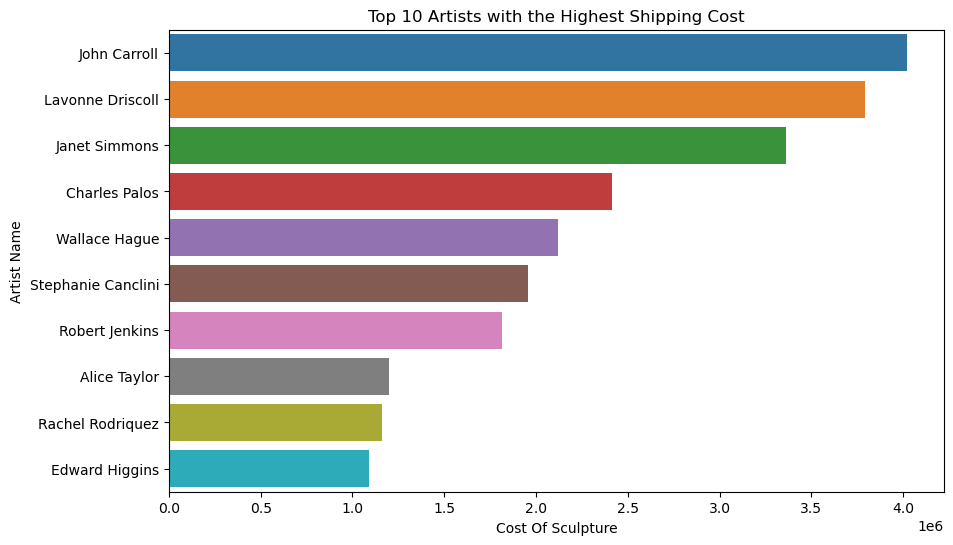

In [31]:
top_N = 10  
top_prices = df.nlargest(top_N, 'Cost')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_prices, x='Cost', y='Artist Name')
plt.title(f"Top {top_N} Artists with the Highest Shipping Cost")
plt.xlabel("Cost Of Sculpture")
plt.ylabel("Artist Name")
plt.show()

#### There are some artists who's sculptures shipping cost is high. They might be shipping internationally.

In [32]:
df.groupby('Transport').Cost.mean()

Transport
Airways      19384.756801
Roadways     12836.249737
Waterways     9174.476276
Name: Cost, dtype: float64

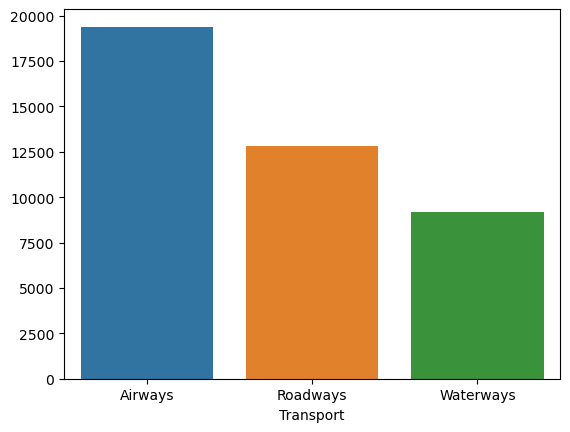

In [33]:
sns.barplot(x=df.groupby('Transport').Cost.mean().index, y = df.groupby('Transport').Cost.mean().values);

#### Mean shipping cost of airways is much higher. 
#### Waterways is cheaper than other ways.

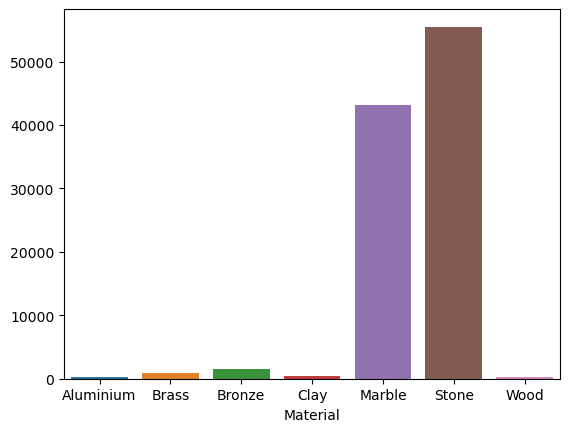

In [34]:
sns.barplot(x=df.groupby('Material').Cost.mean().index, y = df.groupby('Material').Cost.mean().values);

#### The shipping cost of Marble and Stone Sculptures are much higher than other material sculputures.

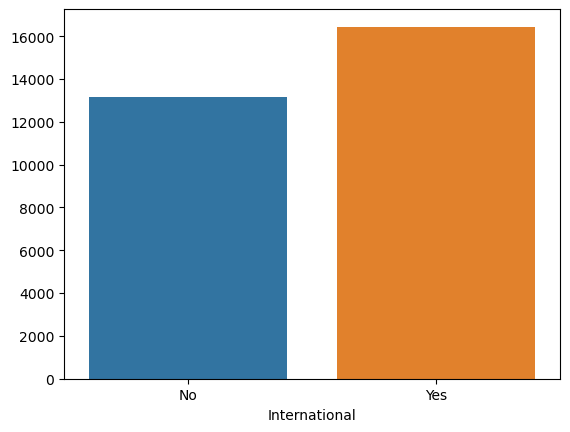

In [35]:
sns.barplot(x=df.groupby('International').Cost.mean().index, y = df.groupby('International').Cost.mean().values);

#### There is no big difference in the shipping cost of international or local. 

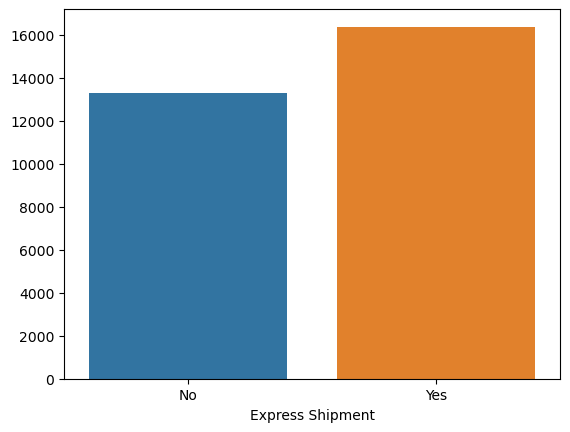

In [36]:
sns.barplot(x=df.groupby('Express Shipment').Cost.mean().index, y = df.groupby('Express Shipment').Cost.mean().values);

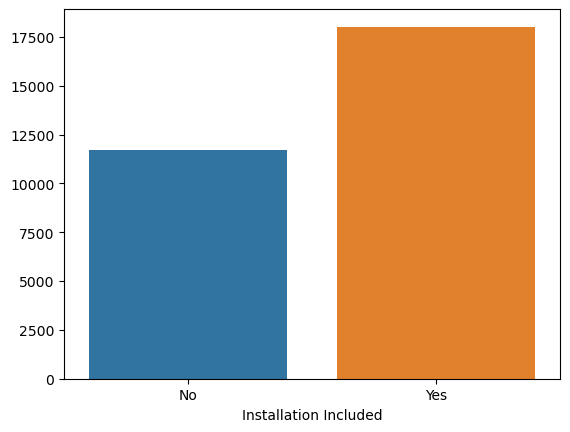

In [37]:
sns.barplot(x=df.groupby('Installation Included').Cost.mean().index, y = df.groupby('Installation Included').Cost.mean().values);

#### If the installlation included the shipping cost increases. 
#### They might adding installation cost into shipping cost

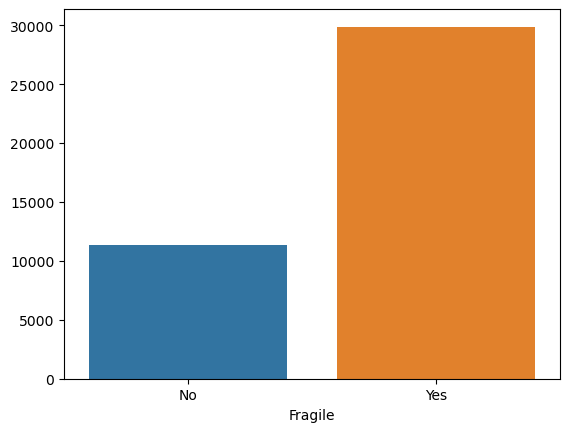

In [38]:
sns.barplot(x=df.groupby('Fragile').Cost.mean().index, y = df.groupby('Fragile').Cost.mean().values);

#### If the Sculpture is fragile then the cost is higher. 

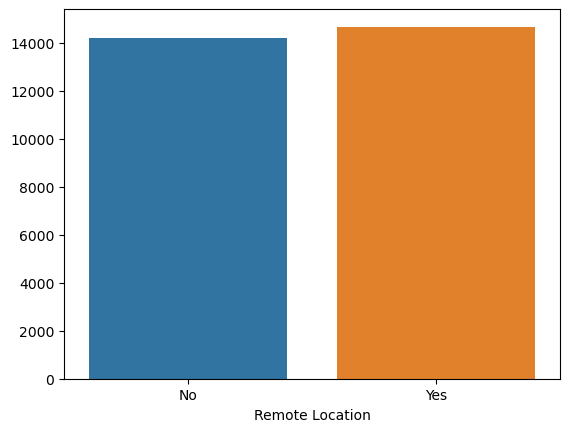

In [39]:
sns.barplot(x=df.groupby('Remote Location').Cost.mean().index, y = df.groupby('Remote Location').Cost.mean().values);

# Handling Date Columns

In [40]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [41]:
df['Scheduled year'] = df['Scheduled Date'].dt.year
df['Scheduled month'] = df['Scheduled Date'].dt.month
df['Scheduled day'] = df['Scheduled Date'].dt.day

df['Delivery year'] = df['Delivery Date'].dt.year
df['Delivery month'] = df['Delivery Date'].dt.month
df['Delivery day']  = df['Delivery Date'].dt.day

df['Date Diff'] = df['Scheduled Date']-df['Delivery Date']

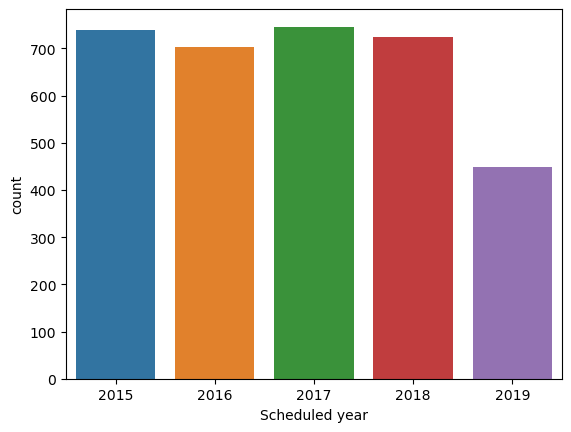

In [42]:
sns.countplot(df['Scheduled year']);

#### There is no big difference between items shipped in different years. But 2019 show a big drop.

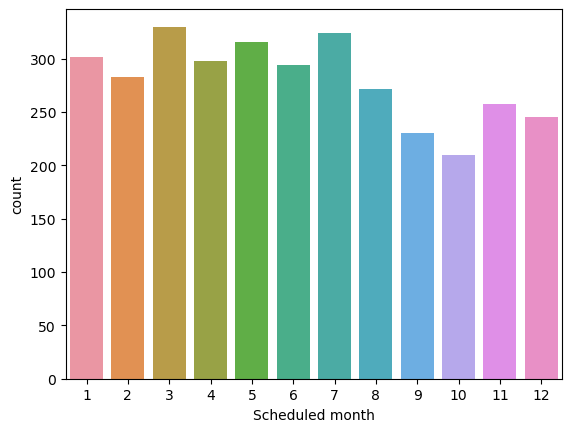

In [43]:
sns.countplot(df['Scheduled month']);

#### Shipped items count in decreasing from 8th to 10th month. So the order count might have also decresed.

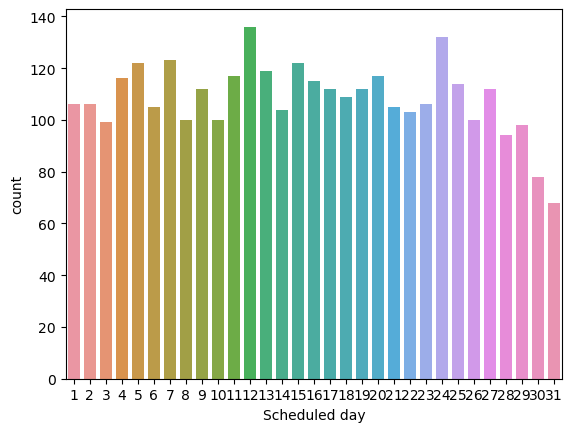

In [44]:
sns.countplot(df['Scheduled day']);

In [45]:
df['Date Diff'] = df['Date Diff'].dt.days

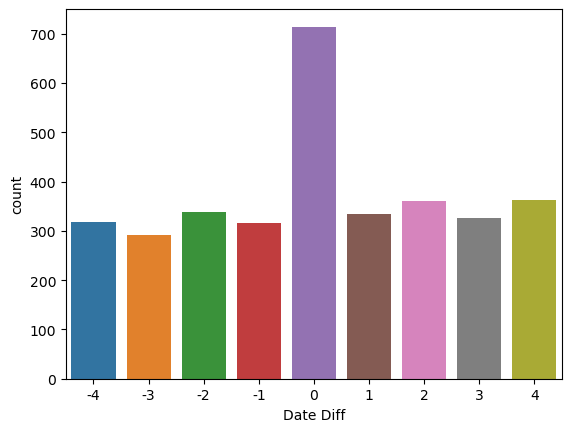

In [46]:
sns.countplot(df['Date Diff']);

In [47]:
df['Artist Name'].value_counts()

John Brown        3
James Moore       3
Mary Stewart      2
Mary Williams     2
John Cooke        2
                 ..
Joseph Holmes     1
Rose Gray         1
George Earl       1
Debra White       1
Vernon Carroll    1
Name: Artist Name, Length: 3351, dtype: int64

#### There are a lot of artists are present.

# Feature Engineering 

#### I'm using label encoding just to keep number of features less.

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
df['Artist Name'] = le.fit_transform(df['Artist Name'])

In [50]:
pd.set_option('display.max_columns', None)
df.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Scheduled year,Scheduled month,Scheduled day,Delivery year,Delivery month,Delivery day,Date Diff
0,303,0.26,6.126545,1.740233,6.251024,Brass,1.697205,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29,2015,6,7,2015,6,3,4
1,1442,0.28,1.454371,1.079095,3.555010,Brass,1.384435,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96,2017,3,6,2017,3,5,1
2,1906,0.07,3.607715,1.567782,4.514538,Clay,1.215260,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29,2015,3,9,2015,3,8,1
4,2766,0.15,6.126545,1.740233,4.722544,Aluminium,0.945166,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,2016,12,18,2016,12,14,4
6,680,0.64,6.126545,2.120077,6.553875,Brass,1.476063,90.67,No,Yes,No,Roadways,No,Working Class,No,2016-06-05,2016-06-02,"South Matthew, WV 76033",-1536.66,2016,6,5,2016,6,2,3


In [51]:
df['Material'] = le.fit_transform(df['Material'])
df['International'] = le.fit_transform(df['International'])
df['Express Shipment'] = le.fit_transform(df['Express Shipment'])
df['Installation Included'] = le.fit_transform(df['Installation Included'])
df['Transport'] = le.fit_transform(df['Transport'])
df['Fragile'] = le.fit_transform(df['Fragile'])
df['Customer Information'] = le.fit_transform(df['Customer Information'])
df['Remote Location'] = le.fit_transform(df['Remote Location'])
df['Scheduled Date'] = le.fit_transform(df['Scheduled Date'])
df['Delivery Date'] = le.fit_transform(df['Delivery Date'])
df['Customer Location'] = le.fit_transform(df['Customer Location'])


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 0 to 6499
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Name            3362 non-null   int32  
 1   Artist Reputation      3362 non-null   float64
 2   Height                 3362 non-null   float64
 3   Width                  3362 non-null   float64
 4   Weight                 3362 non-null   float64
 5   Material               3362 non-null   int32  
 6   Price Of Sculpture     3362 non-null   float64
 7   Base Shipping Price    3362 non-null   float64
 8   International          3362 non-null   int32  
 9   Express Shipment       3362 non-null   int32  
 10  Installation Included  3362 non-null   int32  
 11  Transport              3362 non-null   int32  
 12  Fragile                3362 non-null   int32  
 13  Customer Information   3362 non-null   int32  
 14  Remote Location        3362 non-null   int32  
 15  Sche

# Removing Outliers

#### I'm using IQR technique, you can use any other technique.

In [53]:
df['Width'].describe()

count    3362.000000
mean        2.047839
std         0.491367
min         0.685344
25%         1.740233
50%         2.010256
75%         2.386540
max         3.579069
Name: Width, dtype: float64

<AxesSubplot:xlabel='Width'>

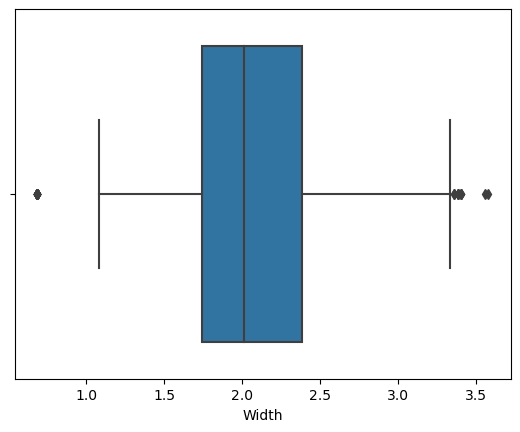

In [54]:
sns.boxplot(df['Width'])

In [55]:
q1 = df['Width'].quantile(.25)
q3 = df['Width'].quantile(.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
print(q1, q3, iqr, ll, ul)
df = df[(df['Width']>=df['Width'].quantile(.25)) & (df['Width']<=df['Width'].quantile(.75))]

1.740232781969171 2.386540241412837 0.646307459443666 0.770771592803672 3.3560014305783357


<AxesSubplot:xlabel='Width'>

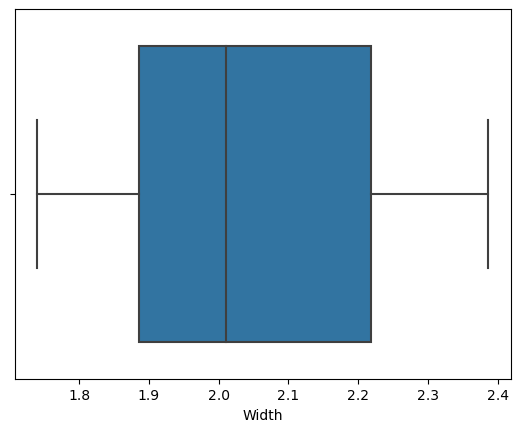

In [56]:
sns.boxplot(df['Width'])

In [57]:
q1 = df['Weight'].quantile(.25)
q3 = df['Weight'].quantile(.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
print(q1, q3, iqr, ll, ul)
df = df[(df['Weight']>=ll) & (df['Weight']<=ul)]

5.231967262455722 7.364818629342254 2.1328513668865323 2.0326902121259236 10.564095679672054


<AxesSubplot:xlabel='Weight'>

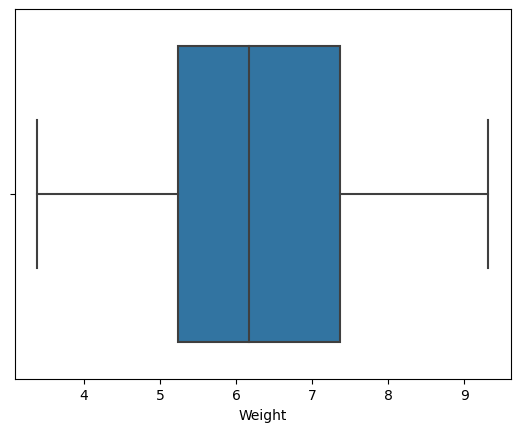

In [58]:
sns.boxplot(df['Weight'])

In [59]:
q1 = df['Height'].quantile(.25)
q3 = df['Height'].quantile(.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
print(q1, q3, iqr, ll, ul)
df = df[(df['Height']>=ll) & (df['Height']<=q3)]

5.6415036571039066 8.200429713524976 2.558926056421069 1.8031145724723028 12.03881879815658


<AxesSubplot:xlabel='Height'>

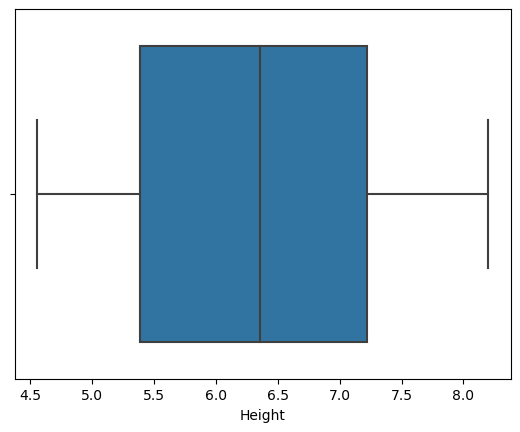

In [60]:
sns.boxplot(df['Height'])

# Model Building

## Separating dependent and independent features

In [61]:
x = df.drop('Cost',axis=1)
y = df['Cost']

In [62]:
y = abs(y)
y = np.log(y)
y[:5]

0    5.646471
4    5.070350
6    7.337367
7    6.046000
9    6.726557
Name: Cost, dtype: float64

#### Some values of cost are negative, just making them positive then applying log transformation.

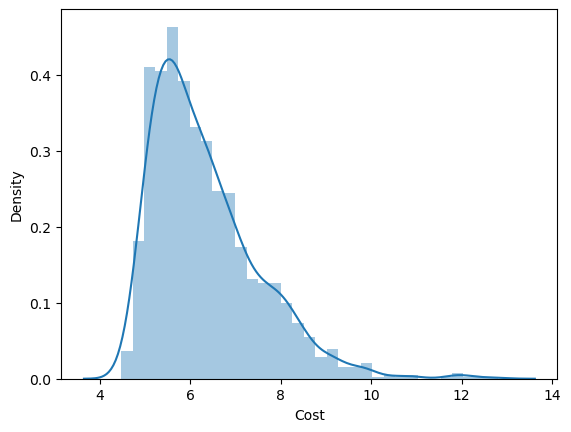

In [63]:
sns.distplot(y);

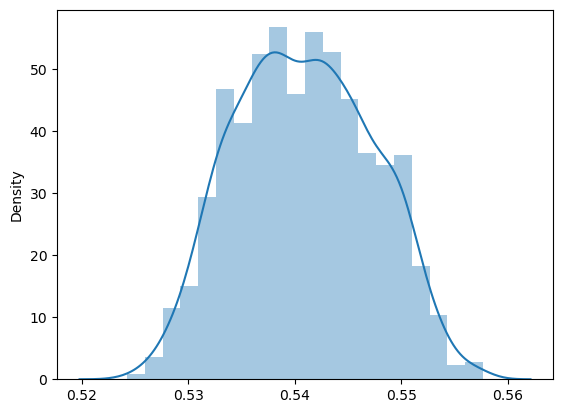

In [64]:
y_transformed, values = stats.boxcox(y)
sns.distplot(y_transformed)
plt.show();

#### Applied box-cox transformation to make it a normally distributed.

## Normalizing the data using StandardScalar.

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xcols = x.columns
x = sc.fit_transform(x)
x = pd.DataFrame(x, columns=xcols)
x.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Scheduled year,Scheduled month,Scheduled day,Delivery year,Delivery month,Delivery day,Date Diff
0,-1.397247,-0.760661,-0.185569,-1.212978,0.074417,-0.953045,0.080721,-0.759314,1.382460,1.495343,-0.817399,-1.170273,-0.396648,0.608000,-0.497305,-1.385061,-1.396430,0.320029,-1.387356,-0.056460,-1.029268,-1.384925,-0.052540,-1.493580,1.585878
1,1.145756,-1.178084,-0.185569,-1.212978,-1.127914,-1.448457,-1.358728,-0.923112,1.382460,1.495343,1.223392,-1.170273,-0.396648,0.608000,-0.497305,-0.283579,-0.292658,-1.525938,-0.635871,1.735983,0.250029,-0.635027,1.734625,-0.208677,1.585878
2,-1.008001,0.681344,-0.185569,0.752018,0.312645,-0.953045,-0.342560,2.055137,-0.723348,1.495343,-0.817399,0.148689,-0.396648,0.608000,-0.497305,-0.679829,-0.685685,1.229710,-0.635871,-0.056460,-1.261867,-0.635027,-0.052540,-1.610390,1.168804
3,-0.999742,1.060819,1.049353,1.258370,-0.024411,0.037780,0.019012,-0.873556,1.382460,-0.668743,-0.817399,1.467651,2.521130,-1.644737,-0.497305,1.589176,1.564221,-1.137098,1.618582,-0.056460,-1.378167,1.614669,-0.350401,1.777083,1.585878
4,-0.330693,-1.291926,1.049353,0.752018,1.521858,0.533193,1.398188,0.488275,-0.723348,-0.668743,-0.817399,0.148689,-0.396648,0.608000,-0.497305,-0.601994,-0.612728,-0.531326,-0.635871,0.242281,-0.215170,-0.635027,0.245320,-0.675914,1.585878


## Splitting the dataset into training and testing

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size=.3, random_state=42)

In [67]:
x_train.shape, x_test.shape

((1055, 25), (453, 25))

## Using Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## Making a function to evaluate the model

In [69]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

def evaluation(model):
  
    # Make predictions on the training and test data
    Y_train_pred = model.predict(x_train)
    Y_test_pred = model.predict(x_test)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, Y_test_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, Y_test_pred)
    r2_test = r2_score(y_test, Y_test_pred)
    r2_train = r2_score(y_train, Y_train_pred)

    # Calculate Adjusted R-squared
    n = len(y_test)
    p = len(x_train.columns)
    adjusted_r2 = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

    metrics = {
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Error (MAE)": mae,
        "R-squared (R2) - Test": r2_test,
        "R-squared (R2) - Train": r2_train,
        "Adjusted R-squared": adjusted_r2
    }

    return metrics


In [70]:
evaluation(lr)

{'Mean Squared Error (MSE)': 2.9849307231014773e-06,
 'Root Mean Squared Error (RMSE)': 0.0017276952054982029,
 'Mean Absolute Error (MAE)': 0.0013051807307883504,
 'R-squared (R2) - Test': 0.9211299997982862,
 'R-squared (R2) - Train': 0.9347833286399337,
 'Adjusted R-squared': 0.9165123182876472}

#### The rmse of our model is 0.0017 wich is a good and also r2 is above .9.

## Removing the features which are highly correlated.

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
x_train['intercept'] = 1
x_test['intercept'] = 1

In [73]:
def variance(x):
    vif = pd.DataFrame()
    vif["Variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif.sort_values(by='VIF',ascending=False)

In [74]:
variance(x_train)

,Variable,VIF
21,Delivery year,4.609192e+06
18,Scheduled year,4.591041e+06
22,Delivery month,2.002405e+05
19,Scheduled month,1.990931e+05
16,Delivery Date,2.241850e+04
15,Scheduled Date,1.338344e+04
20,Scheduled day,1.529623e+03
23,Delivery day,1.502632e+03
24,Date Diff,1.176455e+02
6,Price Of Sculpture,8.173626e+00


In [75]:
x_train.drop(['Delivery year',
       'Scheduled year',
       'Delivery month',
       'Scheduled month'],axis=1,inplace=True)

x_test.drop(['Delivery year',
       'Scheduled year',
       'Delivery month',
       'Scheduled month'],axis=1,inplace=True)

In [76]:
lr = LinearRegression()
lr.fit(x_train, y_train)
evaluation(lr)

{'Mean Squared Error (MSE)': 3.014930832204916e-06,
 'Root Mean Squared Error (RMSE)': 0.0017363556180128874,
 'Mean Absolute Error (MAE)': 0.0013088554948239115,
 'R-squared (R2) - Test': 0.9203373152000383,
 'R-squared (R2) - Train': 0.9341620091618695,
 'Adjusted R-squared': 0.916261549931203}

In [77]:
variance(x_train)

,Variable,VIF
16,Delivery Date,13039.354725
15,Scheduled Date,13038.100451
6,Price Of Sculpture,8.128202
4,Weight,7.347109
7,Base Shipping Price,2.184979
18,Scheduled day,1.817320
19,Delivery day,1.810500
9,Express Shipment,1.580262
11,Transport,1.468077
20,Date Diff,1.344763


In [78]:
x_train.drop('Scheduled Date',axis=1,inplace=True)
x_test.drop('Scheduled Date',axis=1,inplace=True)

In [79]:
variance(x_train)

,Variable,VIF
6,Price Of Sculpture,8.125259
4,Weight,7.346973
7,Base Shipping Price,2.181963
17,Scheduled day,1.817080
18,Delivery day,1.810413
9,Express Shipment,1.579638
11,Transport,1.468027
2,Height,1.314792
3,Width,1.303977
5,Material,1.247747


In [80]:
x_train.drop('Weight',axis=1,inplace=True)
x_test.drop('Weight',axis=1,inplace=True)

In [81]:
variance(x_train)

,Variable,VIF
5,Price Of Sculpture,2.340916
6,Base Shipping Price,2.077004
16,Scheduled day,1.813851
17,Delivery day,1.809294
8,Express Shipment,1.579181
10,Transport,1.467451
2,Height,1.299257
3,Width,1.287449
12,Customer Information,1.169895
11,Fragile,1.156475


#### VIF values are low and how there is no or very small correlatted features.

In [82]:
x_train.drop('intercept',axis=1,inplace=True)
x_test.drop('intercept',axis=1,inplace=True)

In [83]:
rf = LinearRegression()
rf.fit(x_train, y_train)
evaluation(rf)

{'Mean Squared Error (MSE)': 3.6238749783075088e-06,
 'Root Mean Squared Error (RMSE)': 0.0019036478083688455,
 'Mean Absolute Error (MAE)': 0.0014842386223226248,
 'R-squared (R2) - Test': 0.9042473521887556,
 'R-squared (R2) - Train': 0.9156975088365137,
 'Adjusted R-squared': 0.9000457348483084}

#### After removing some features the rmse increased.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 0 to 6492
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Name            1508 non-null   int32  
 1   Artist Reputation      1508 non-null   float64
 2   Height                 1508 non-null   float64
 3   Width                  1508 non-null   float64
 4   Weight                 1508 non-null   float64
 5   Material               1508 non-null   int32  
 6   Price Of Sculpture     1508 non-null   float64
 7   Base Shipping Price    1508 non-null   float64
 8   International          1508 non-null   int32  
 9   Express Shipment       1508 non-null   int32  
 10  Installation Included  1508 non-null   int32  
 11  Transport              1508 non-null   int32  
 12  Fragile                1508 non-null   int32  
 13  Customer Information   1508 non-null   int32  
 14  Remote Location        1508 non-null   int32  
 15  Sche

In [85]:
df.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Scheduled year,Scheduled month,Scheduled day,Delivery year,Delivery month,Delivery day,Date Diff
0,303,0.26,6.126545,1.740233,6.251024,1,1.697205,16.27,1,1,0,0,0,1,0,141,141,2008,-283.29,2015,6,7,2015,6,3,4
4,2766,0.15,6.126545,1.740233,4.722544,0,0.945166,11.94,1,1,1,0,0,1,0,608,610,204,-159.23,2016,12,18,2016,12,14,4
6,680,0.64,6.126545,2.120077,6.553875,1,1.476063,90.67,0,1,0,1,0,1,0,440,443,2897,-1536.66,2016,6,5,2016,6,2,3
7,688,0.74,7.427961,2.217958,6.125387,3,1.664966,13.25,1,0,0,2,1,0,0,1402,1399,584,-422.42,2019,6,4,2019,5,31,4
9,1336,0.12,7.427961,2.120077,8.091104,4,2.385515,49.25,0,0,0,1,0,1,0,473,474,1176,-834.27,2016,7,14,2016,7,10,4


In [86]:
x.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Scheduled year,Scheduled month,Scheduled day,Delivery year,Delivery month,Delivery day,Date Diff
0,-1.397247,-0.760661,-0.185569,-1.212978,0.074417,-0.953045,0.080721,-0.759314,1.382460,1.495343,-0.817399,-1.170273,-0.396648,0.608000,-0.497305,-1.385061,-1.396430,0.320029,-1.387356,-0.056460,-1.029268,-1.384925,-0.052540,-1.493580,1.585878
1,1.145756,-1.178084,-0.185569,-1.212978,-1.127914,-1.448457,-1.358728,-0.923112,1.382460,1.495343,1.223392,-1.170273,-0.396648,0.608000,-0.497305,-0.283579,-0.292658,-1.525938,-0.635871,1.735983,0.250029,-0.635027,1.734625,-0.208677,1.585878
2,-1.008001,0.681344,-0.185569,0.752018,0.312645,-0.953045,-0.342560,2.055137,-0.723348,1.495343,-0.817399,0.148689,-0.396648,0.608000,-0.497305,-0.679829,-0.685685,1.229710,-0.635871,-0.056460,-1.261867,-0.635027,-0.052540,-1.610390,1.168804
3,-0.999742,1.060819,1.049353,1.258370,-0.024411,0.037780,0.019012,-0.873556,1.382460,-0.668743,-0.817399,1.467651,2.521130,-1.644737,-0.497305,1.589176,1.564221,-1.137098,1.618582,-0.056460,-1.378167,1.614669,-0.350401,1.777083,1.585878
4,-0.330693,-1.291926,1.049353,0.752018,1.521858,0.533193,1.398188,0.488275,-0.723348,-0.668743,-0.817399,0.148689,-0.396648,0.608000,-0.497305,-0.601994,-0.612728,-0.531326,-0.635871,0.242281,-0.215170,-0.635027,0.245320,-0.675914,1.585878


In [87]:
y.head()

0    5.646471
4    5.070350
6    7.337367
7    6.046000
9    6.726557
Name: Cost, dtype: float64

## Ridge Regression

In [88]:
from sklearn.linear_model import Ridge
rf = Ridge()
rf.fit(x_train, y_train)
evaluation(rf)

{'Mean Squared Error (MSE)': 3.624363890403952e-06,
 'Root Mean Squared Error (RMSE)': 0.0019037762185729584,
 'Mean Absolute Error (MAE)': 0.0014839120543674717,
 'R-squared (R2) - Test': 0.9042344337994453,
 'R-squared (R2) - Train': 0.9156970527918223,
 'Adjusted R-squared': 0.9000322496012686}

#### Ridge Regression is giving the same result like linear regression

## Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(x_train, y_train)
evaluation(ls)

{'Mean Squared Error (MSE)': 3.788209960064883e-05,
 'Root Mean Squared Error (RMSE)': 0.006154843588642106,
 'Mean Absolute Error (MAE)': 0.005067381206523694,
 'R-squared (R2) - Test': -0.0009482565277418864,
 'R-squared (R2) - Train': 0.0,
 'Adjusted R-squared': -0.04486977355782762}

#### Lasso is not performing good.

In [90]:
x.reset_index(drop=True, inplace=True)
y_transformed = pd.DataFrame(y_transformed)
y_transformed.reset_index(drop=True, inplace=True)

# Assumptions Checking

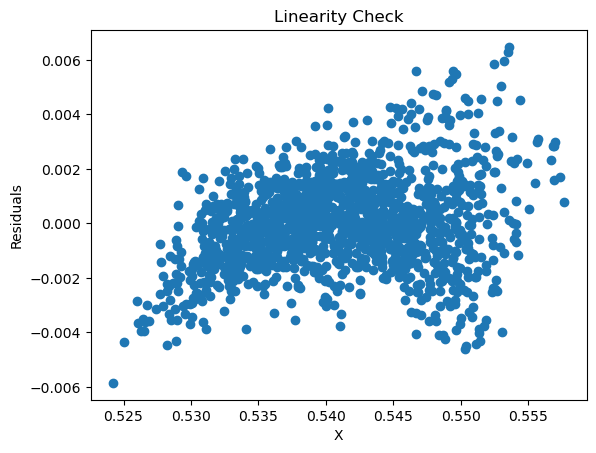

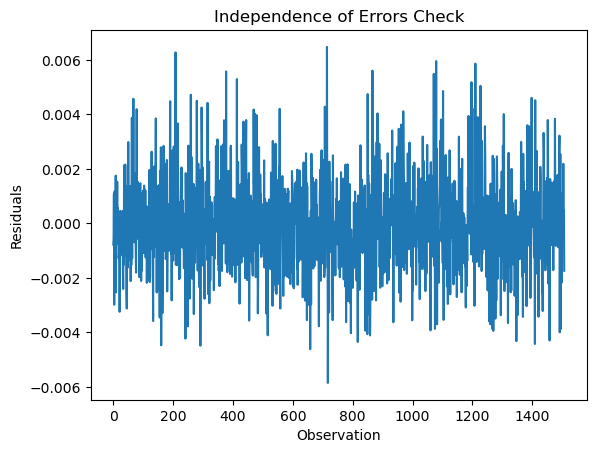

Shapiro-Wilk Test p-value: 3.7880019476688176e-07
Breusch-Pagan Test p-value: 8.1961085410167035e-22
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     807.6
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:01:10   Log-Likelihood:                 7497.2
No. Observations:                1508   AIC:                        -1.494e+04
Df Residuals:                    1482   BIC:                        -1.480e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [91]:
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy.stats import shapiro
# Fit the linear regression model
x = sm.add_constant(x)  # Add a constant term (intercept)
model = sm.OLS(y_transformed, x).fit()

# Check the linearity assumption (scatterplot)
plt.scatter(y_transformed, model.resid)
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

# Check the independence of errors assumption (residuals over time)
plt.plot(model.resid)
plt.xlabel("Observation")
plt.ylabel("Residuals")
plt.title("Independence of Errors Check")
plt.show()

# Check the normality of residuals assumption (Shapiro-Wilk test)
shapiro_stat, shapiro_p_value = shapiro(model.resid)
print("Shapiro-Wilk Test p-value:", shapiro_p_value)

# Check for heteroscedasticity using Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan Test p-value:", bp_test[1])

# Print the summary of the regression model
print(model.summary())


#### The result show that there is strong multicollinearity between features.

In [92]:
model.resid

0      -0.000779
1      -0.000527
2       0.001077
3      -0.002984
4       0.001169
          ...   
1503    0.000051
1504    0.002192
1505    0.000234
1506    0.000470
1507   -0.001739
Length: 1508, dtype: float64

<AxesSubplot:ylabel='Density'>

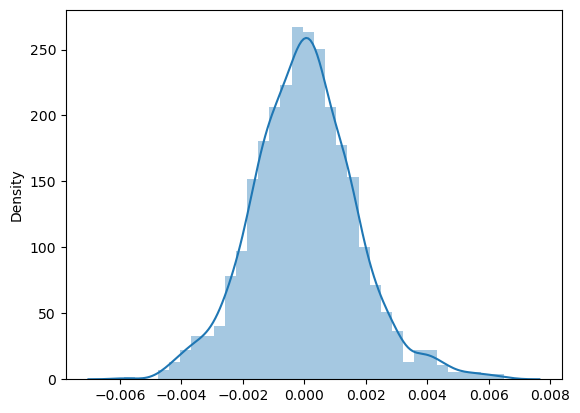

In [93]:
sns.distplot(model.resid)

#### The residuals are normally distributed.

## Feature Selection

In [94]:
from sklearn.feature_selection import RFE

# Create a linear regression model
model = LinearRegression()


rfe = RFE(model, n_features_to_select=5)

# Fit RFE to the data
rfe.fit(x, y_transformed)

# Get the mask of selected features (True for selected features, False for excluded features)
selected_features_mask = rfe.support_

# Get the ranking of features (1 indicates a selected feature, higher values are less important)
feature_ranking = rfe.ranking_

# Print the results
print("Selected features:")
selected_features = [i for i, selected in enumerate(selected_features_mask) if selected]
print(selected_features)

print("Feature ranking:")
print(feature_ranking)

features = pd.DataFrame(feature_ranking, index=x.columns)

Selected features:
[2, 5, 7, 19, 22]
Feature ranking:
[22 18  1 11 17  1 14  1  7 12  9 10 15 20 13 16 19  6 21  1  3  4  1  2
  5  8]


In [95]:
features = features[features[0]==1]
features

,0
Artist Reputation,1
Weight,1
Price Of Sculpture,1
Scheduled year,1
Delivery year,1


In [96]:
x = x[features.index]
x

,Artist Reputation,Weight,Price Of Sculpture,Scheduled year,Delivery year
0,-0.760661,0.074417,0.080721,-1.387356,-1.384925
1,-1.178084,-1.127914,-1.358728,-0.635871,-0.635027
2,0.681344,0.312645,-0.342560,-0.635871,-0.635027
3,1.060819,-0.024411,0.019012,1.618582,1.614669
4,-1.291926,1.521858,1.398188,-0.635871,-0.635027
...,...,...,...,...,...
1503,-0.039659,-1.575516,-0.983233,0.867097,0.864770
1504,1.781821,-0.777397,-0.865888,-1.387356,-1.384925
1505,0.225974,1.291806,1.398421,-1.387356,-1.384925
1506,0.795186,-0.932700,-1.189428,0.867097,0.864770


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size=.3, random_state=42)

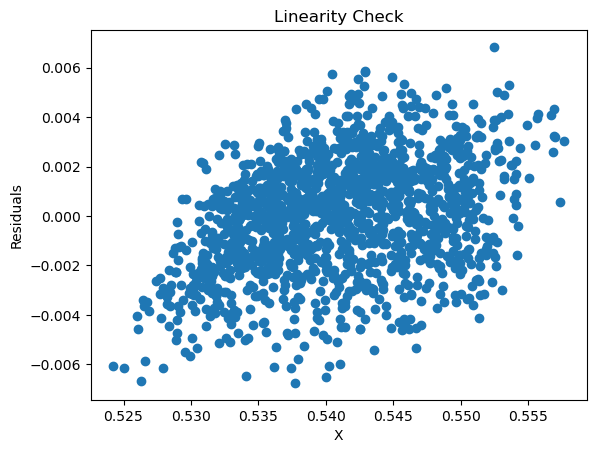

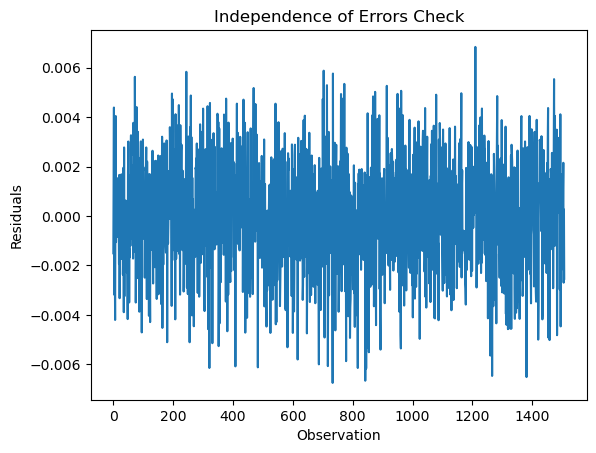

Shapiro-Wilk Test p-value: 0.0014991707867011428
Breusch-Pagan Test p-value: 0.11092592115194297
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     2062.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:01:11   Log-Likelihood:                 7029.6
No. Observations:                1508   AIC:                        -1.405e+04
Df Residuals:                    1502   BIC:                        -1.402e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [98]:
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy.stats import shapiro
# Fit the linear regression model
x = sm.add_constant(x)  # Add a constant term (intercept)
model = sm.OLS(y_transformed, x).fit()

# Check the linearity assumption (scatterplot)
plt.scatter(y_transformed, model.resid)
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Linearity Check")
plt.show()

# Check the independence of errors assumption (residuals over time)
plt.plot(model.resid)
plt.xlabel("Observation")
plt.ylabel("Residuals")
plt.title("Independence of Errors Check")
plt.show()

# Check the normality of residuals assumption (Shapiro-Wilk test)
shapiro_stat, shapiro_p_value = shapiro(model.resid)
print("Shapiro-Wilk Test p-value:", shapiro_p_value)

# Check for heteroscedasticity using Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan Test p-value:", bp_test[1])

# Print the summary of the regression model
print(model.summary())


<AxesSubplot:ylabel='Density'>

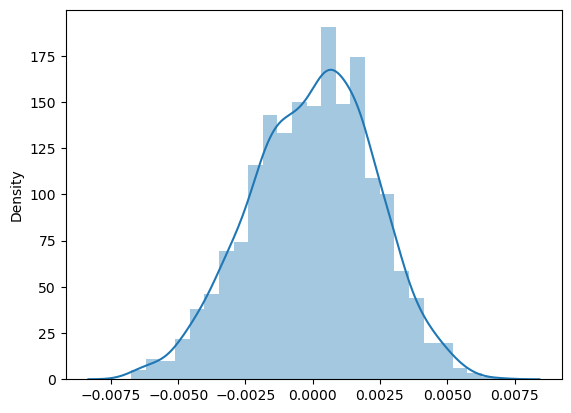

In [99]:
sns.distplot(model.resid)

In [100]:
rf = LinearRegression()
rf.fit(x_train, y_train)
evaluation(rf)

{'Mean Squared Error (MSE)': 4.944194996420135e-06,
 'Root Mean Squared Error (RMSE)': 0.002223554585887231,
 'Mean Absolute Error (MAE)': 0.00179634293198472,
 'R-squared (R2) - Test': 0.8693609009592711,
 'R-squared (R2) - Train': 0.873673701294498,
 'Adjusted R-squared': 0.8678996134979654}

#### Now the results are good.

# Conclusion 
#####  Our regression model has successfully addressed the challenge of predicting shipping costs for sculptures. This enables us to optimize our pricing strategies, enhance cost-efficiency, and make data-driven decisions. The model achieved impressive performance with metrics such as an R-squared (R²) score of approximately 0.86 and a root mean squared error (RMSE) of approximately 0.022, indicating its accuracy and reliability in cost prediction.